In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
train.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

## Functions:

1. Distribution Plot

In [20]:
def distribution(col):
    fig, axes = plt.subplots(1, 2, figsize=(13, 8))
    fig.suptitle(col)
    axes[0].set_title('Train')
    axes[1].set_title('Test')
    sns.distplot(ax=axes[0], x=train[col])
    sns.distplot(ax=axes[1], x=test[col])

2. Joint Plot

In [4]:
def joint(col1, col2):
    sns.jointplot(x= col1, y=col2, data=train)

3. Pair Plot Partial

In [5]:
# SAMPLE OF BREAKING THE DS INTO A FEW COLUMNS AT A TIME SO IT'S EASIER TO SEE THE PAIRPLOT RESULTS

# df1 = train[['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
#        'floor_area', 'energy_star_rating', 'ELEVATION', 'site_eui']]
# sns.pairplot(data=df1, hue='Year_Factor')
#corr_1 = df1.corr()

## 1. Year Factor

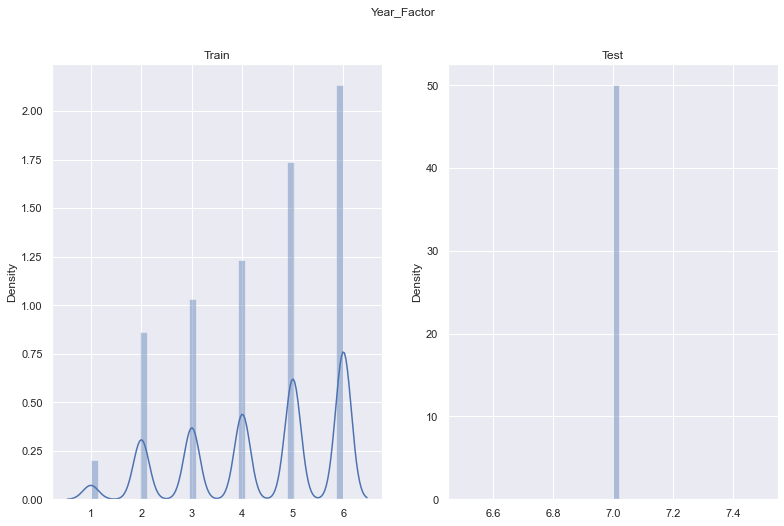

In [62]:
distribution('Year_Factor')

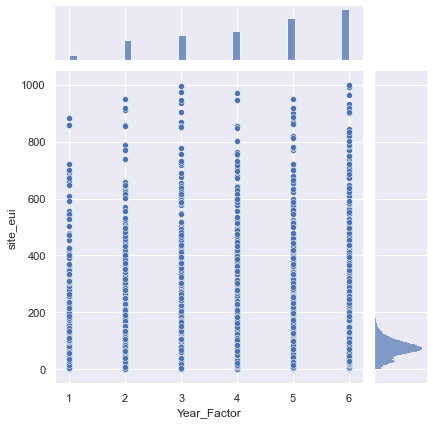

In [7]:
joint('Year_Factor', 'site_eui')

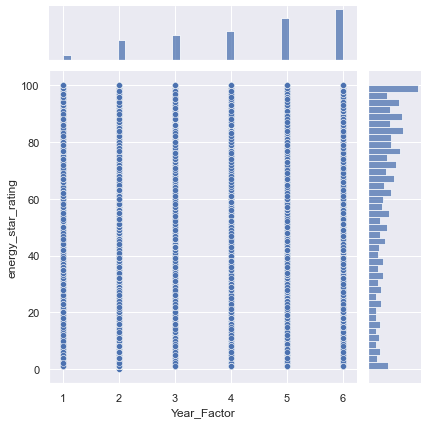

In [8]:
joint('Year_Factor', 'energy_star_rating')

<AxesSubplot:xlabel='site_eui', ylabel='Density'>

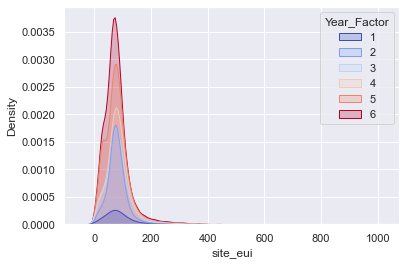

In [9]:
sns.kdeplot(x='site_eui', data=train, hue='Year_Factor', fill=True, palette='coolwarm')

## 2. State Factor

Can't do distribution or joint plots on string data (I don't think) 
We can check the distribution of this data in the categorical section

<AxesSubplot:xlabel='site_eui', ylabel='Density'>

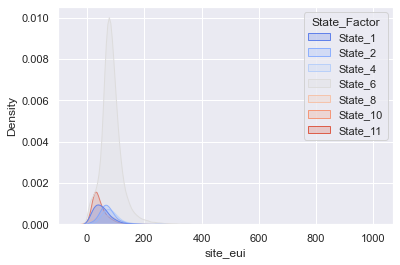

In [12]:
sns.kdeplot(x='site_eui', data=train, hue='State_Factor', fill=True, palette='coolwarm')

## 3. Building Class

<AxesSubplot:xlabel='site_eui', ylabel='Density'>

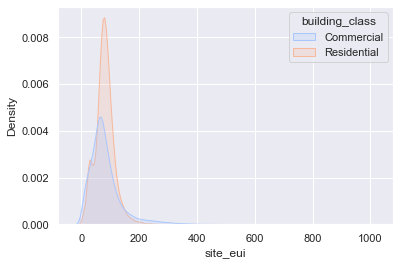

In [14]:
sns.kdeplot(x='site_eui', data=train, hue='building_class', fill=True, palette='coolwarm')

## 4. Facility Type -> fix this

In [16]:
# sns.kdeplot(x='site_eui', data=train, hue='facility_type', fill=True, palette='coolwarm')

## 5. Floor Area

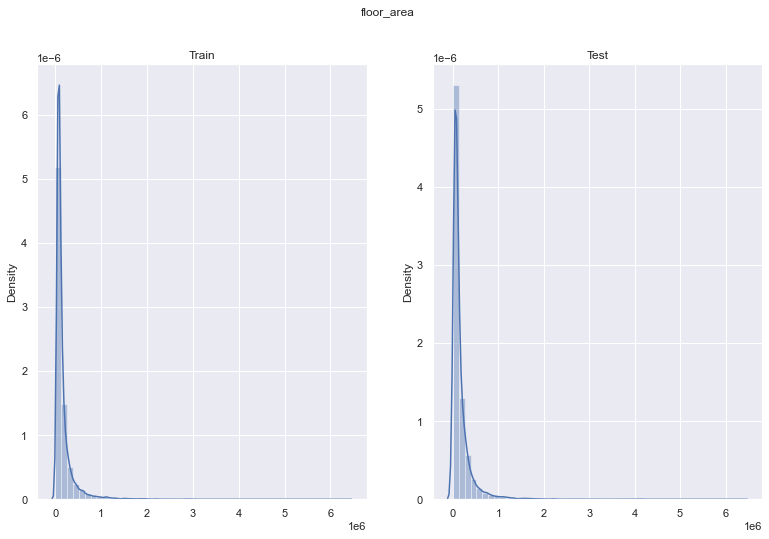

In [61]:
distribution('floor_area')

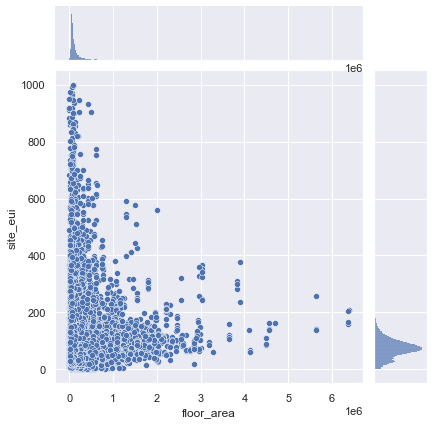

In [22]:
joint('floor_area', 'site_eui')

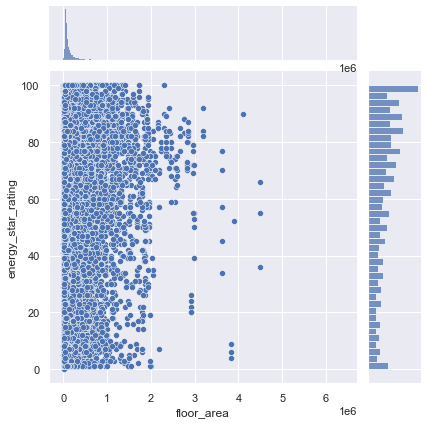

In [23]:
joint('floor_area', 'energy_star_rating')

## 6. Year Built

In [25]:
con1 = train['year_built'] == 0
con2 = train['year_built'].isna()
has_year_train = train[~con1 & ~con2]

con1 = test['year_built'] == 0
con2 = test['year_built'].isna()
has_year_test = test[~con1 & ~con2]

<AxesSubplot:title={'center':'Test'}, ylabel='Density'>

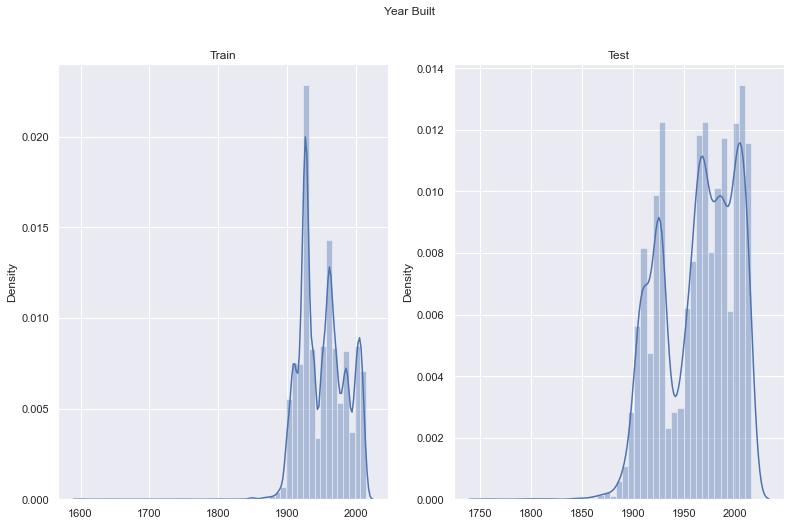

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(13, 8))
fig.suptitle('Year Built')
axes[0].set_title('Train')
axes[1].set_title('Test')
sns.distplot(ax=axes[0], x=has_year_train['year_built'])
sns.distplot(ax=axes[1], x=has_year_test['year_built'])

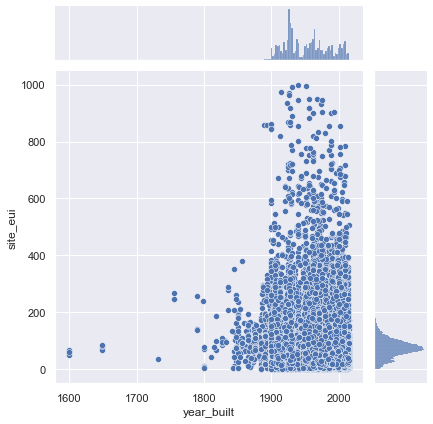

In [27]:
sns.jointplot(x= 'year_built', y='site_eui', data=has_year_train)

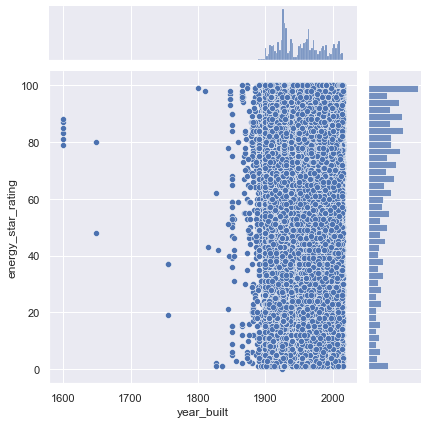

In [29]:
sns.jointplot(x= 'year_built', y='energy_star_rating', data=has_year_train)

## 7. Energy Star Rating

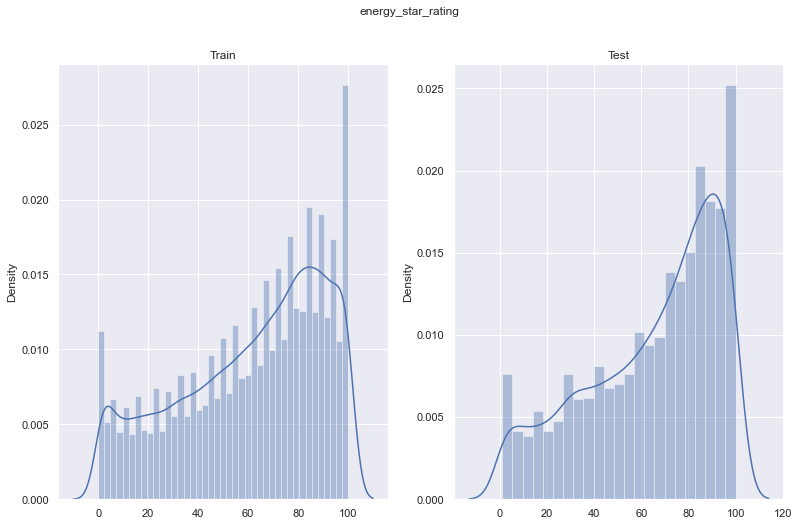

In [59]:
distribution('energy_star_rating')

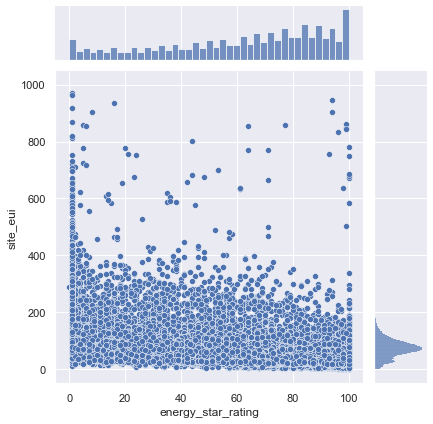

In [31]:
joint('energy_star_rating', 'site_eui')

## 8. Elevation

/Users/atsukosakurai/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/atsukosakurai/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


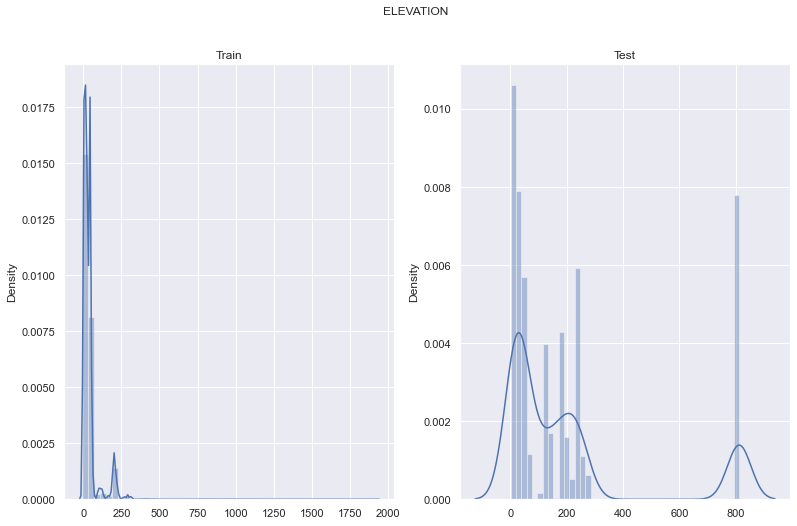

In [32]:
distribution('ELEVATION')

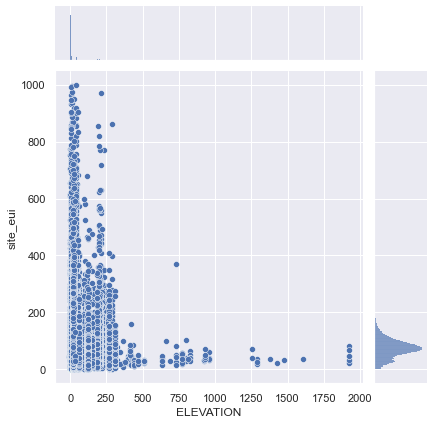

In [33]:
joint('ELEVATION', 'site_eui')

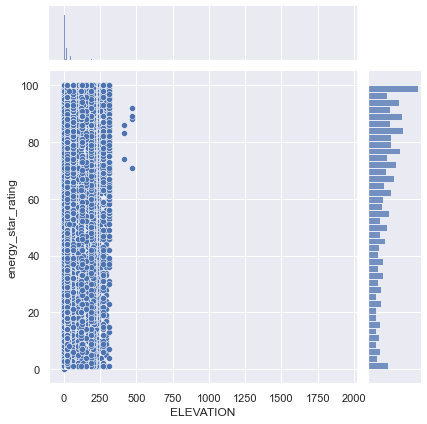

In [34]:
joint('ELEVATION', 'energy_star_rating')

## 9 - 45: Temperatures

In [48]:
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

### Minimums - Distribution

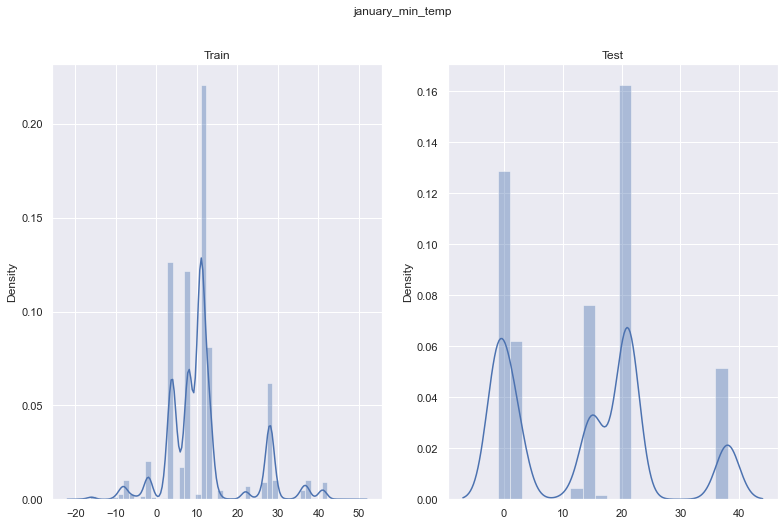

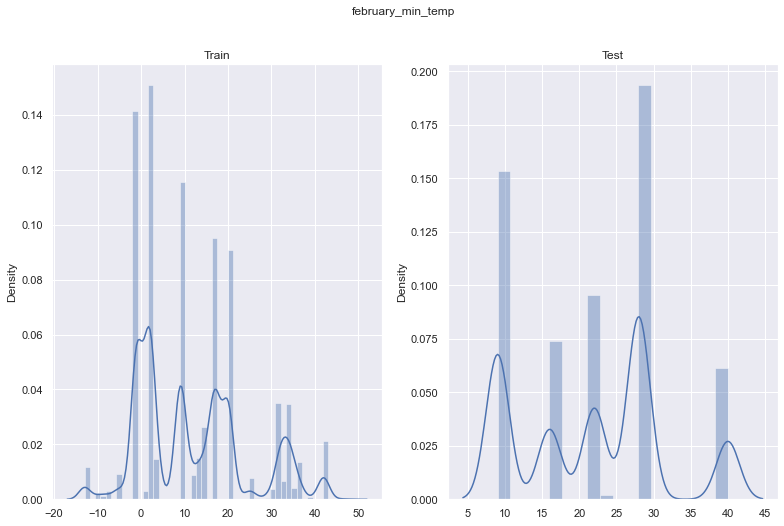

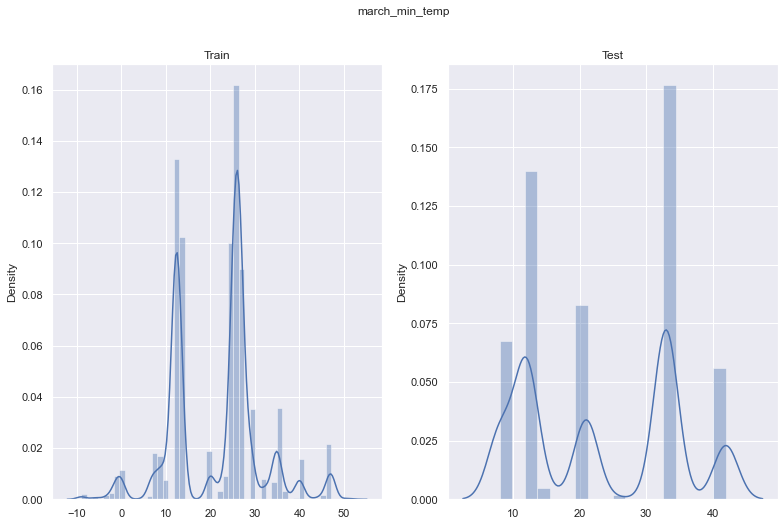

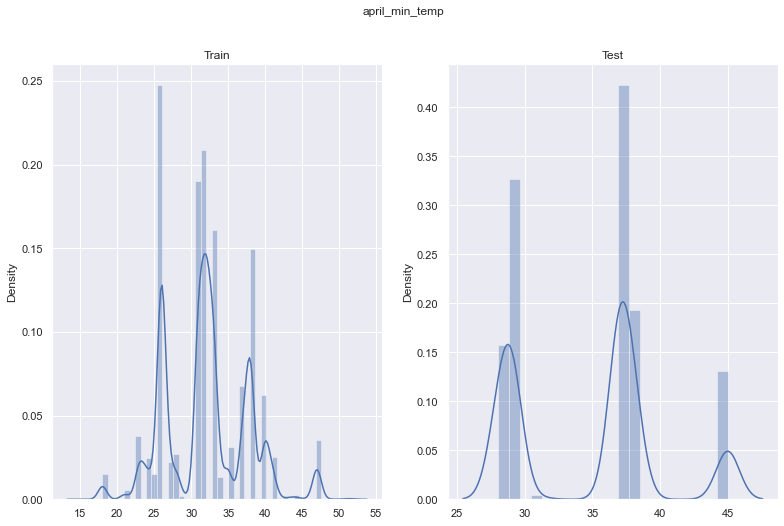

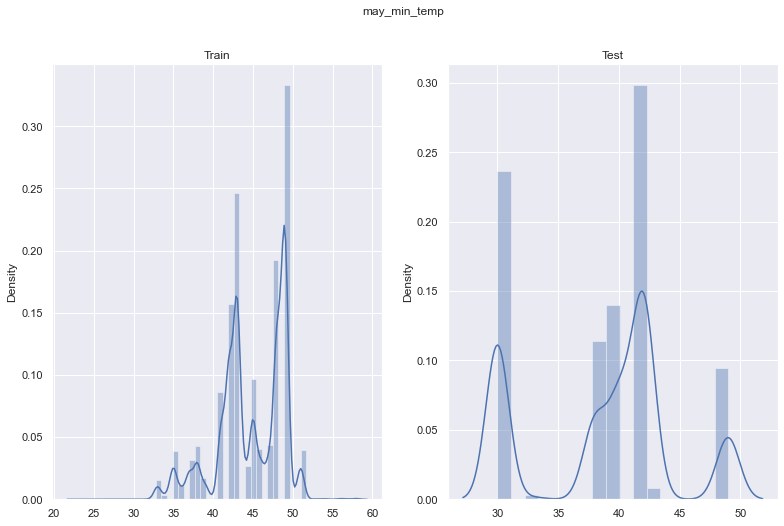

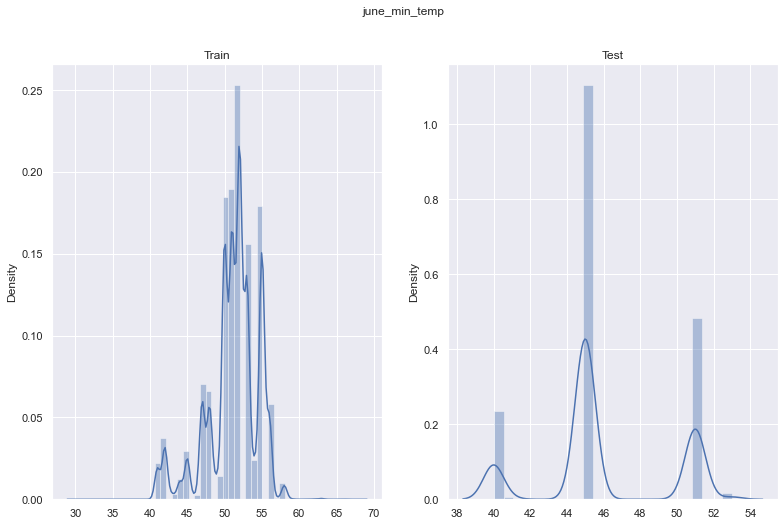

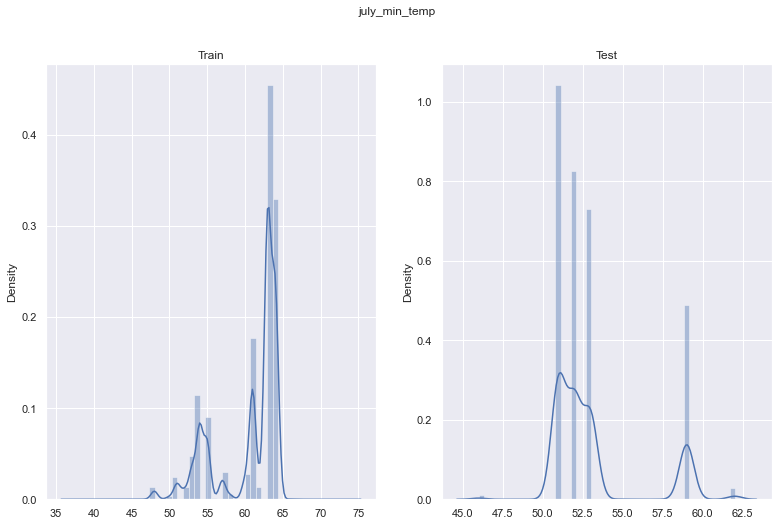

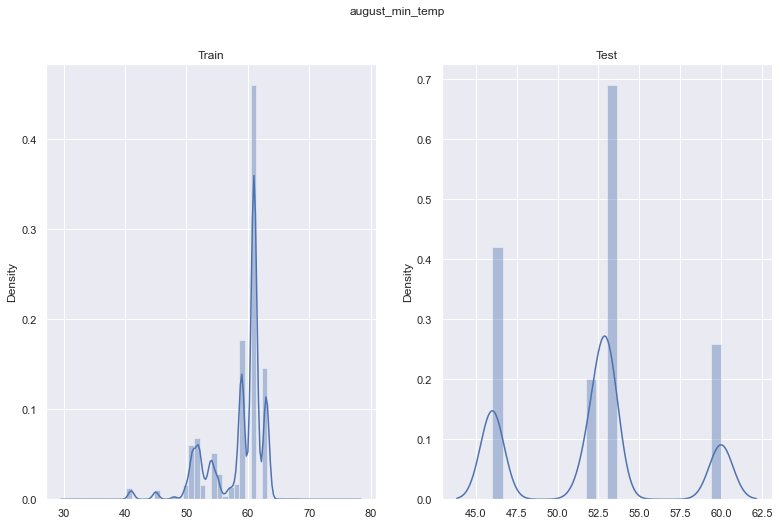

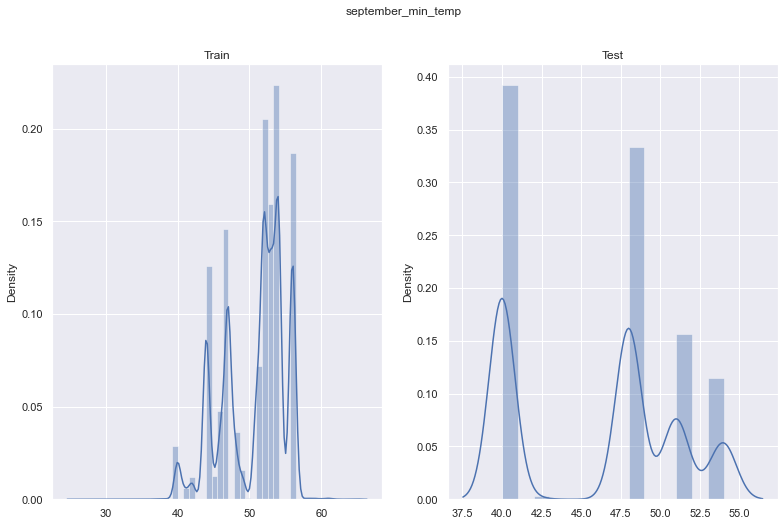

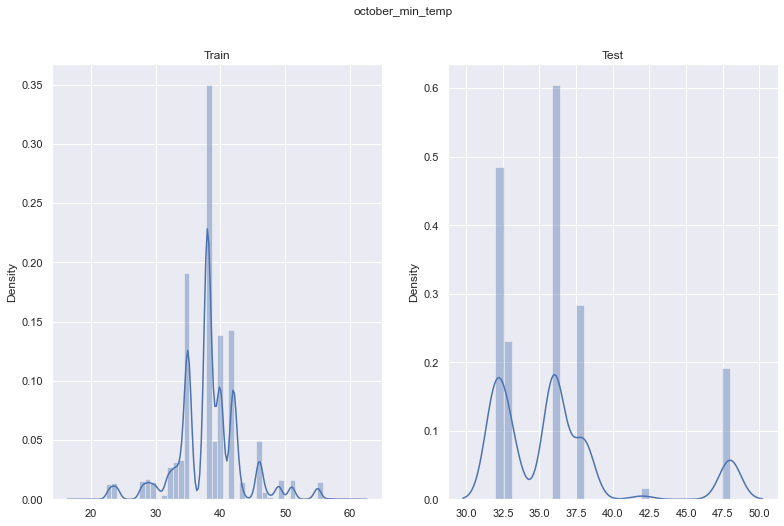

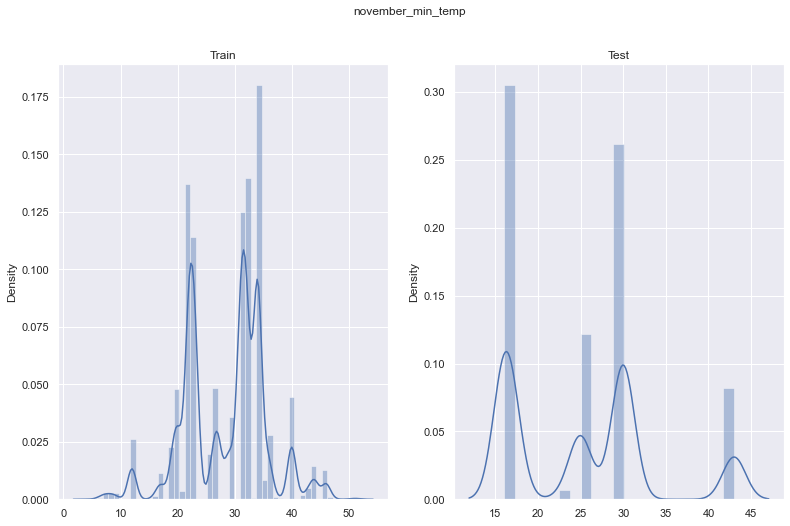

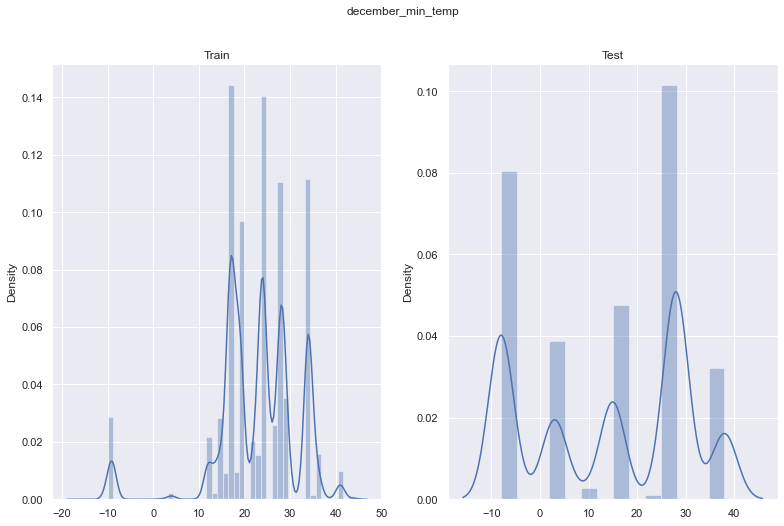

In [47]:
for month in months:
    col  = month + '_min_temp'
    distribution(col)

### Minimums - Joint (temp vs. site eui)

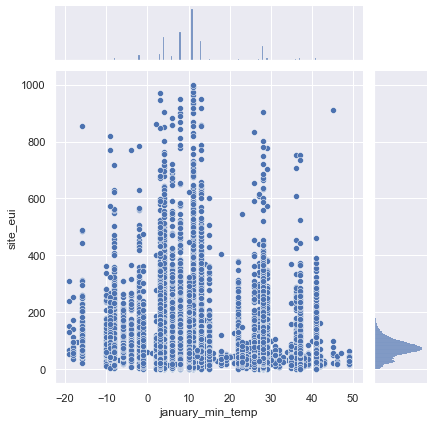

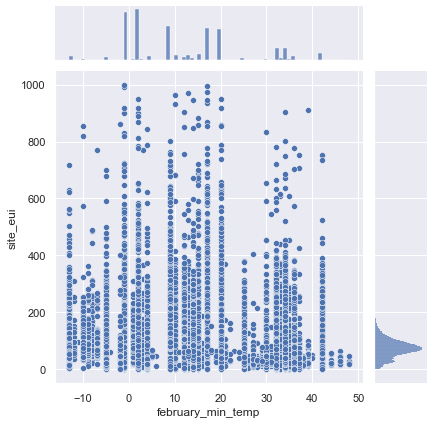

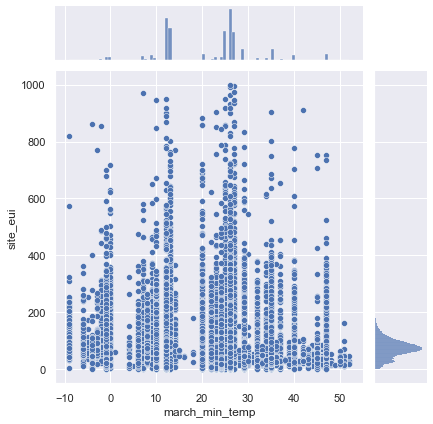

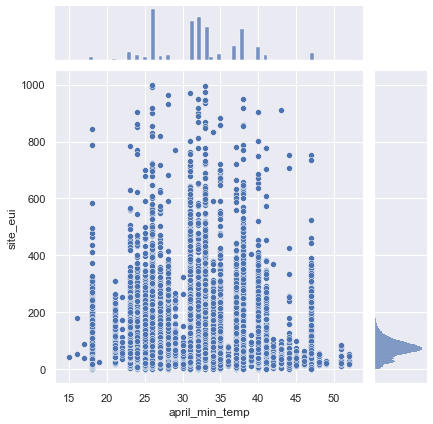

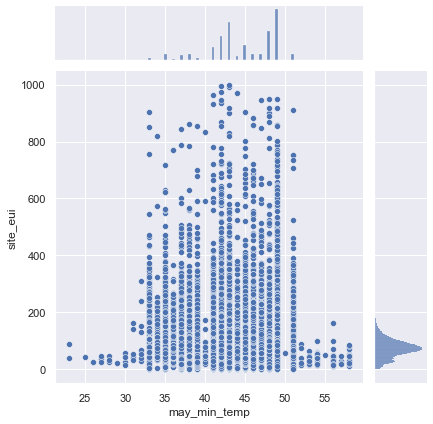

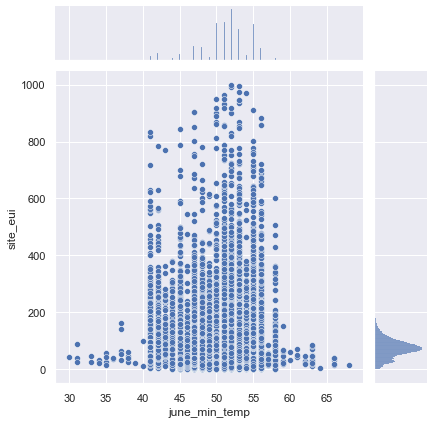

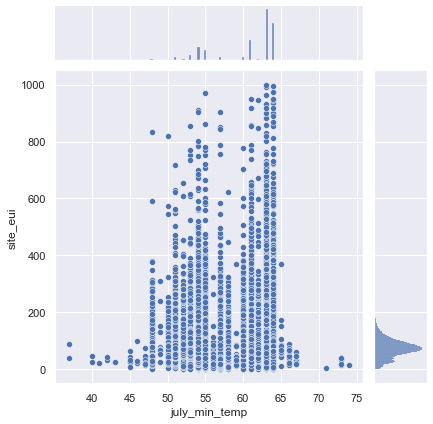

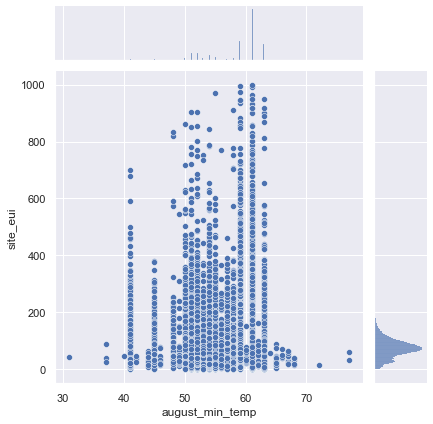

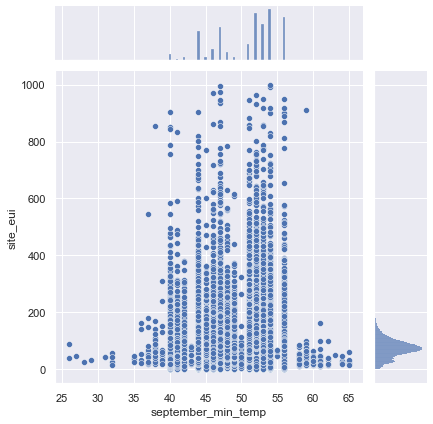

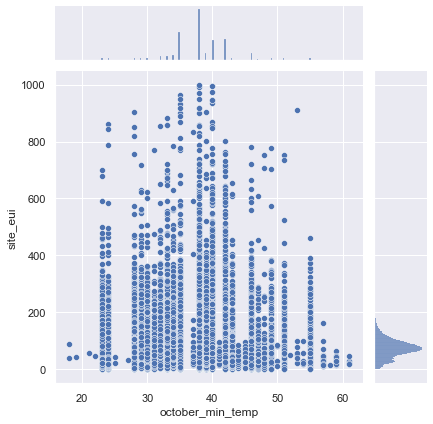

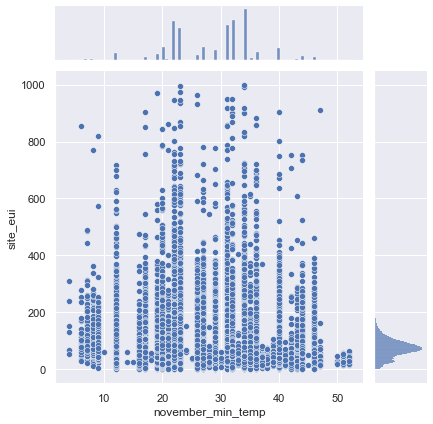

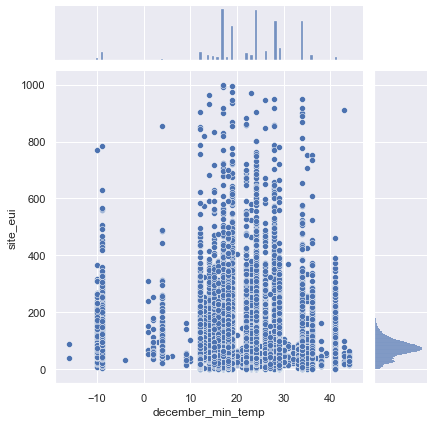

In [49]:
for month in months:
    col1 = month + '_min_temp'
    col2 = 'site_eui'
    joint(col1, col2)

### Minimums - Joint (temp vs. energy star rating)

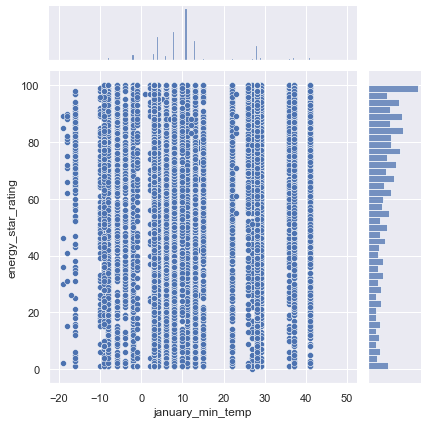

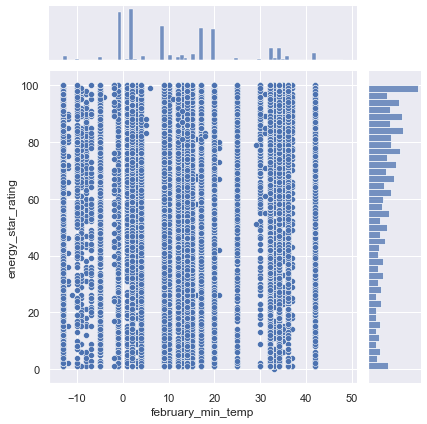

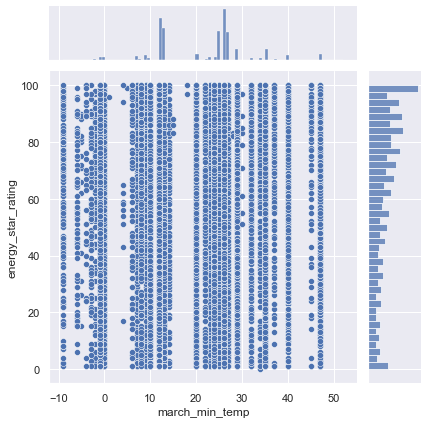

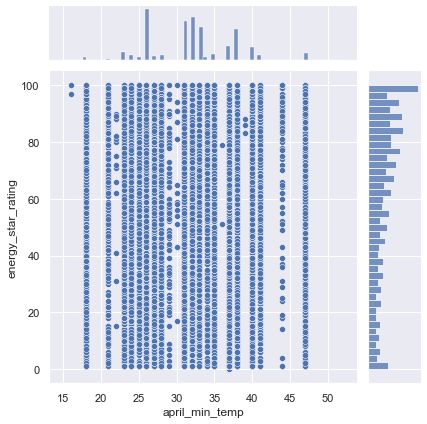

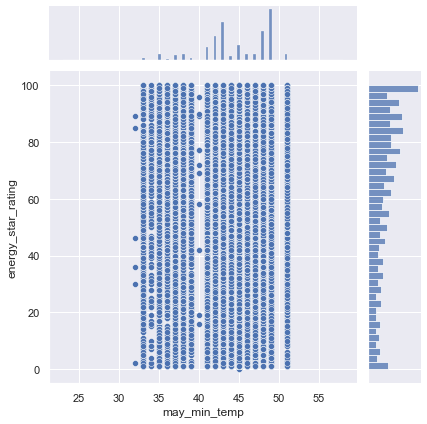

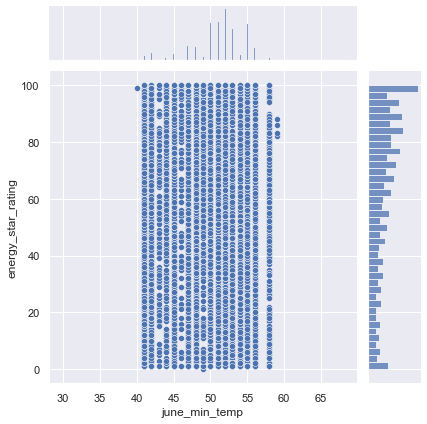

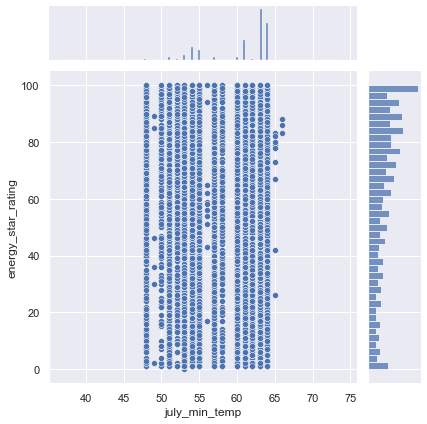

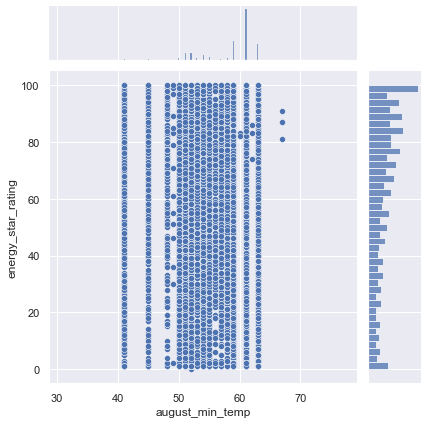

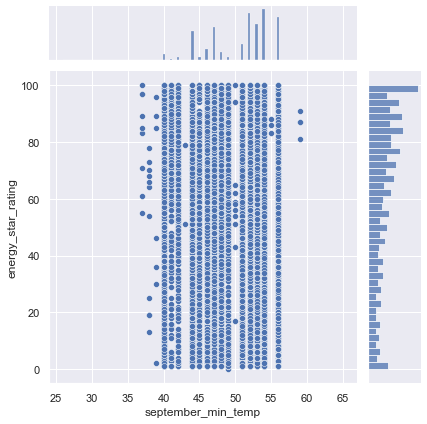

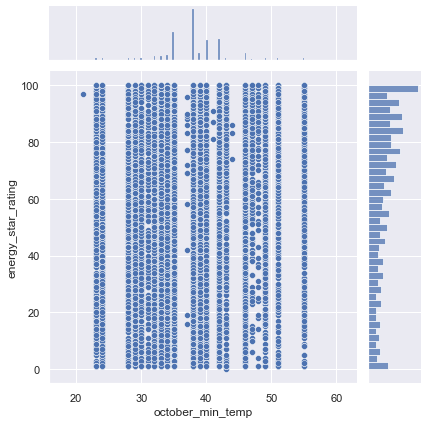

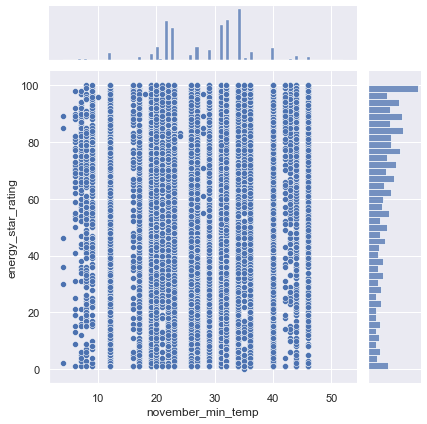

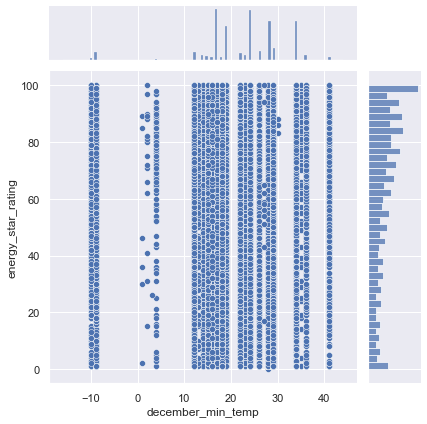

In [50]:
for month in months:
    col1 = month + '_min_temp'
    col2 = 'energy_star_rating'
    joint(col1, col2)

### Averages - Distribution

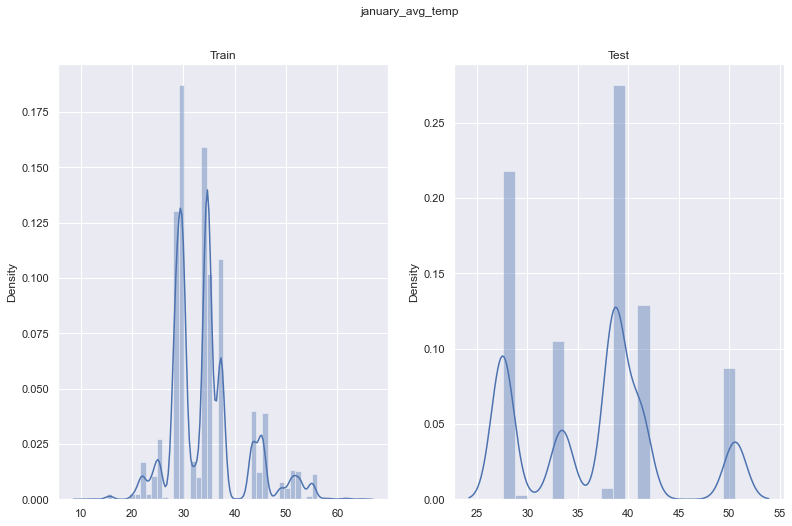

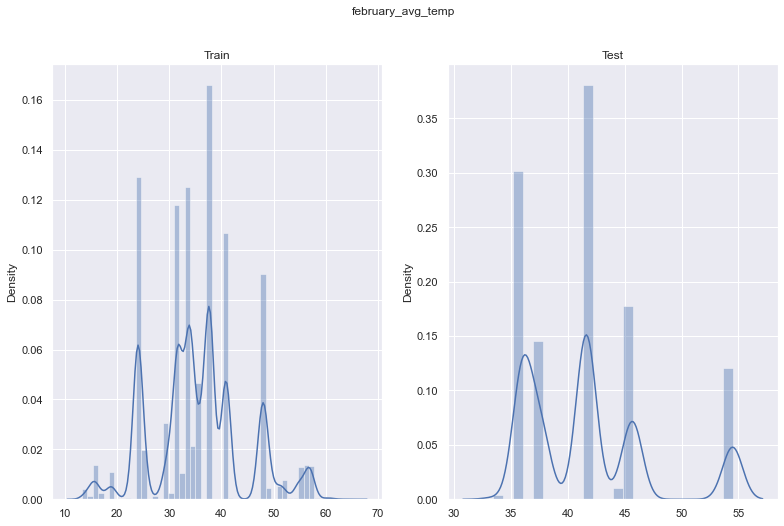

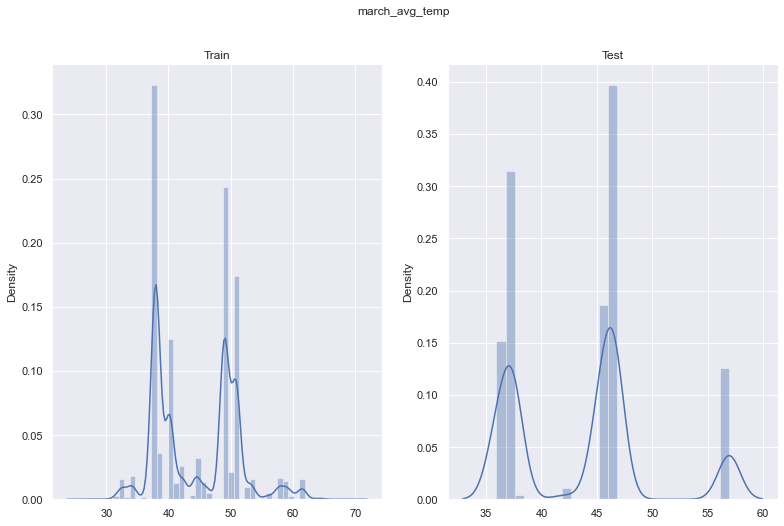

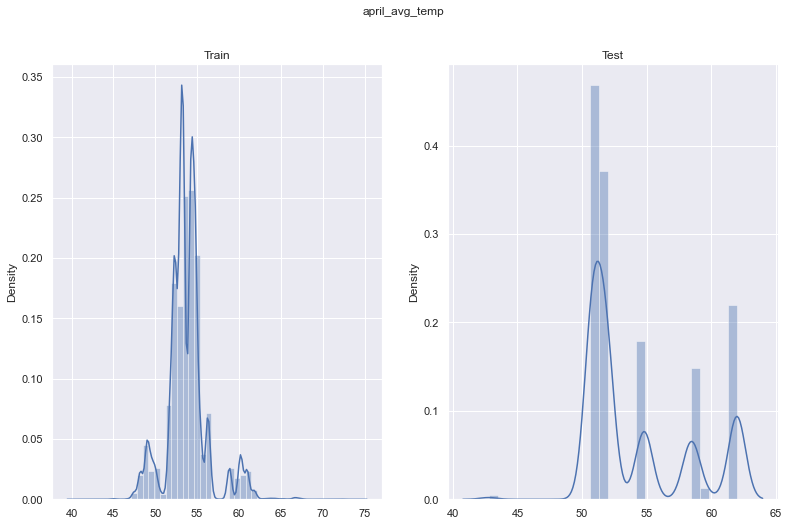

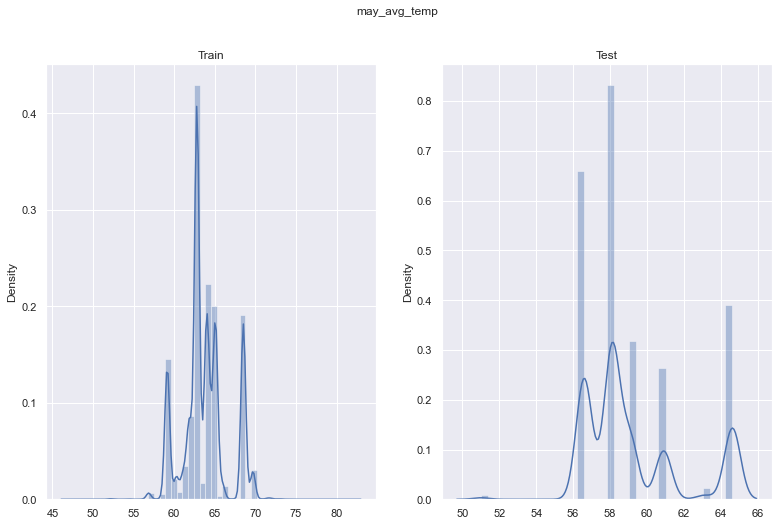

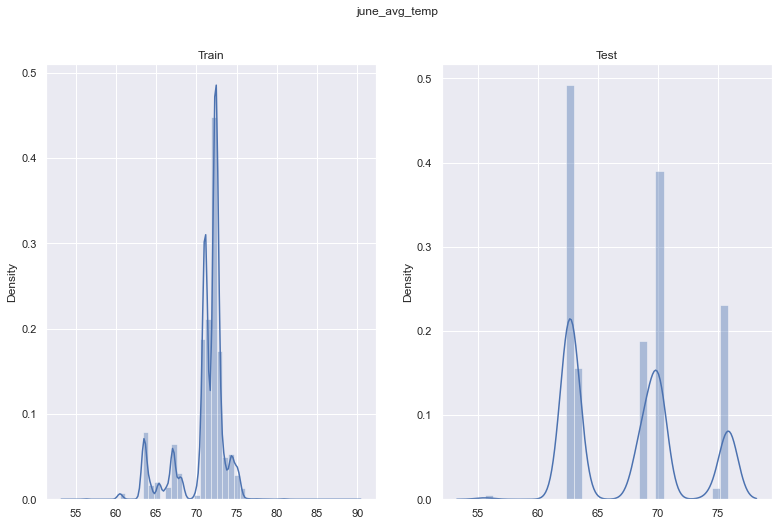

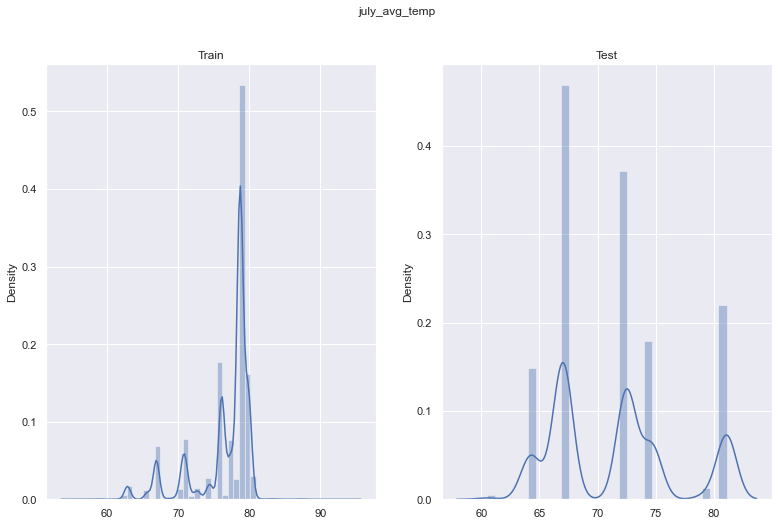

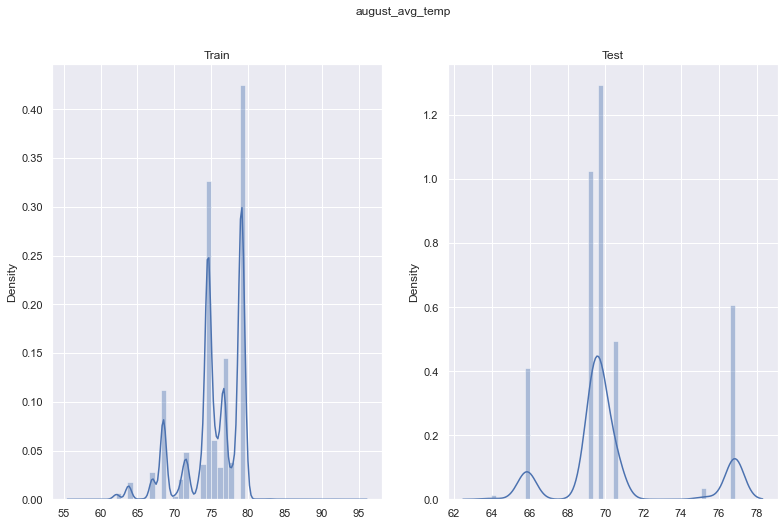

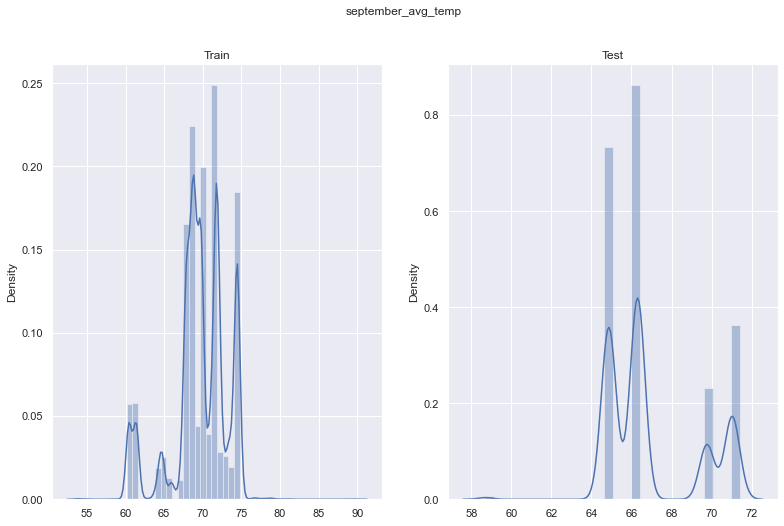

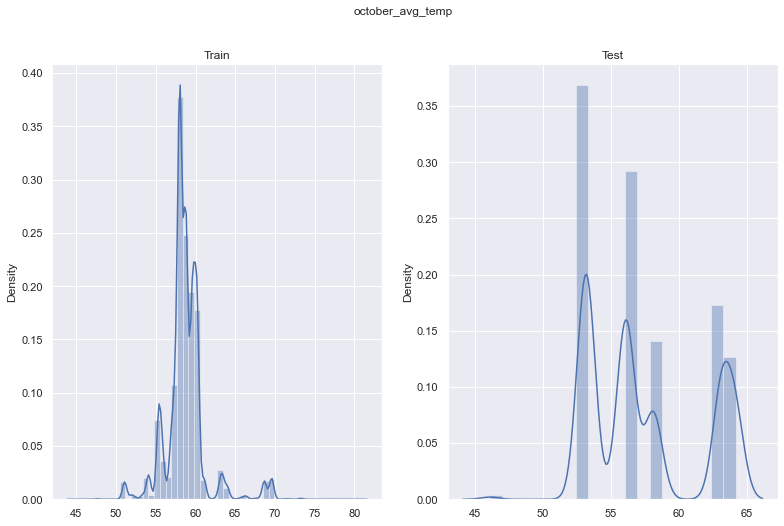

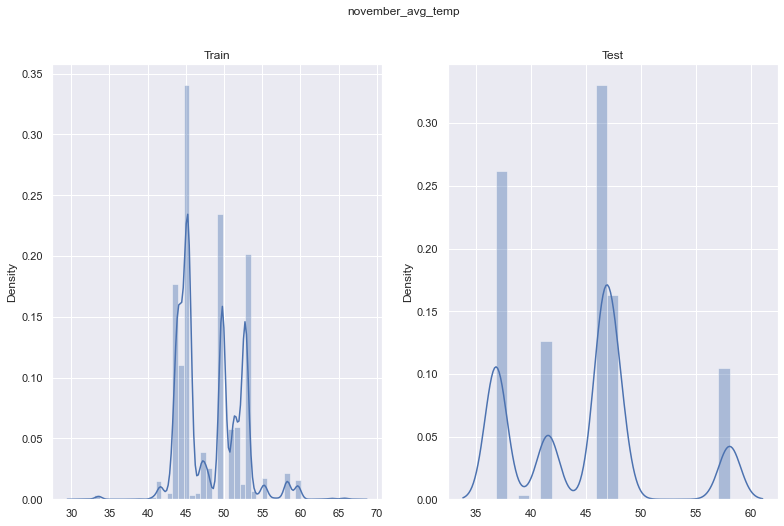

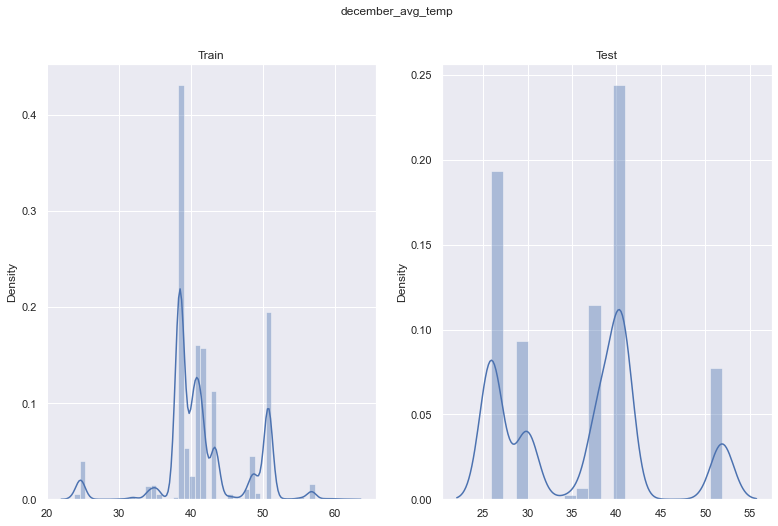

In [51]:
for month in months:
    col = month + '_avg_temp'
    distribution(col)

### Averages - Joint (temp vs. site eui)

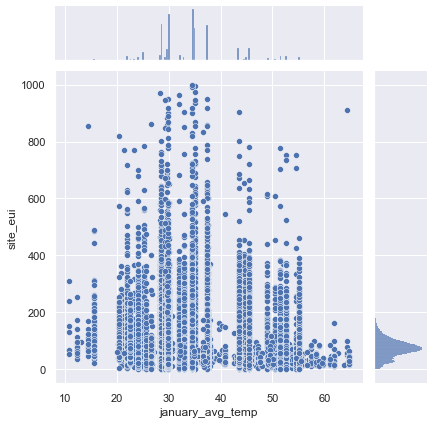

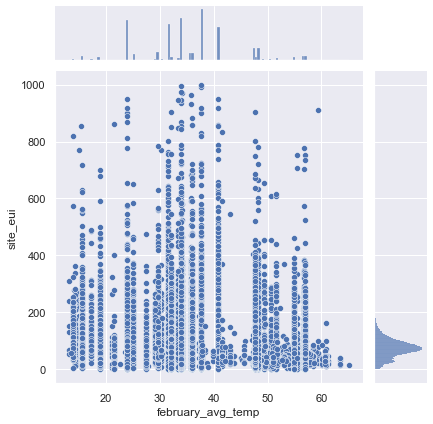

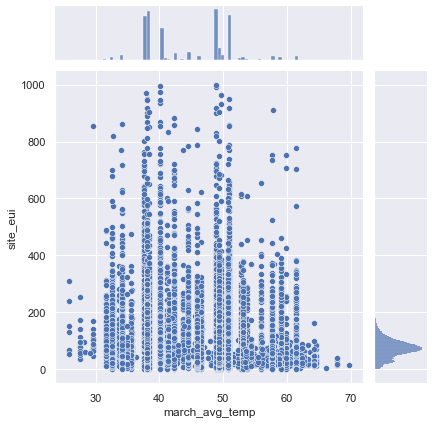

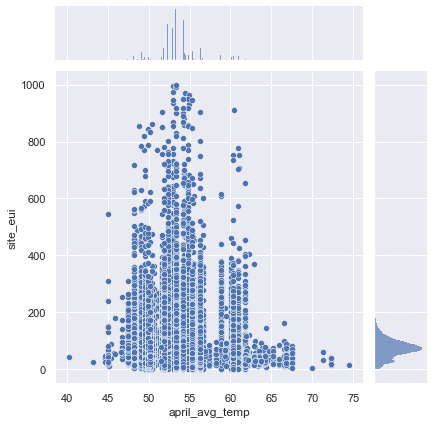

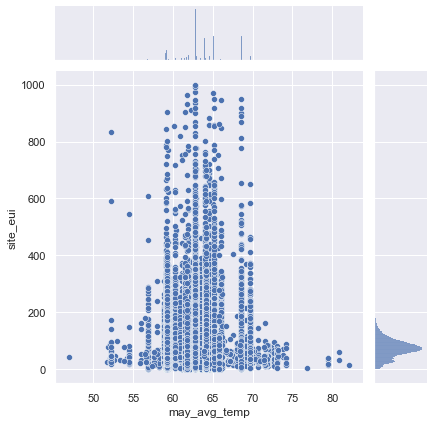

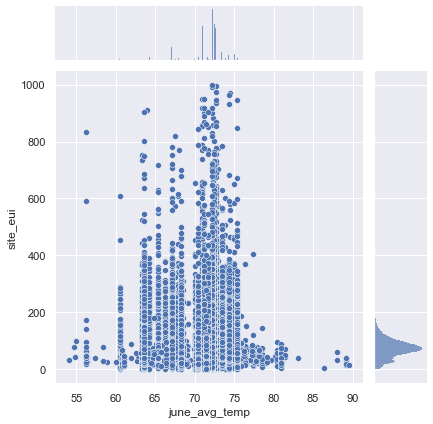

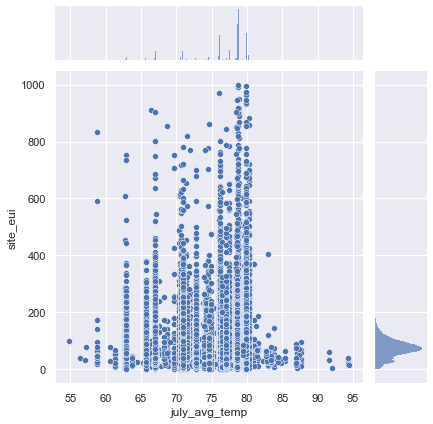

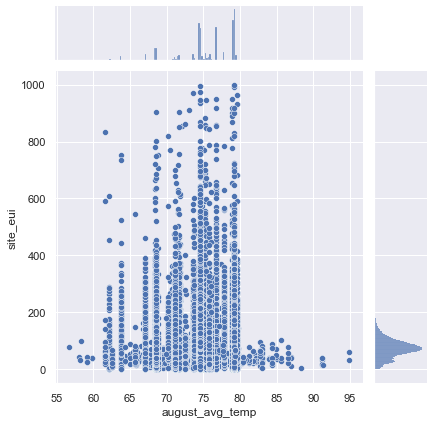

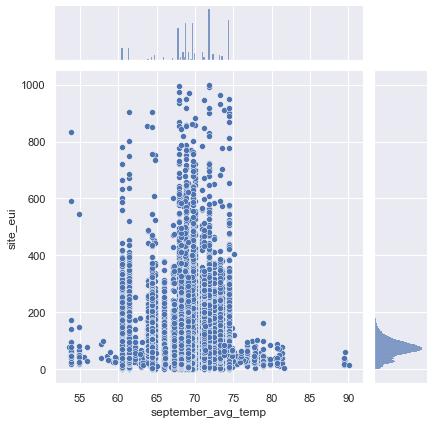

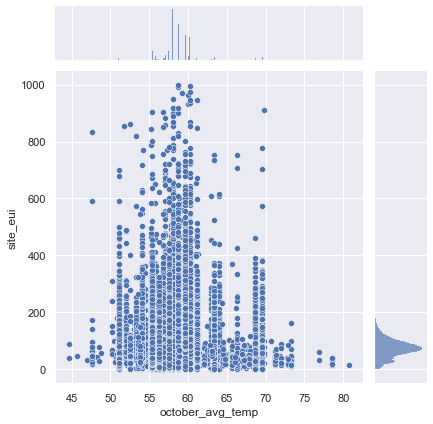

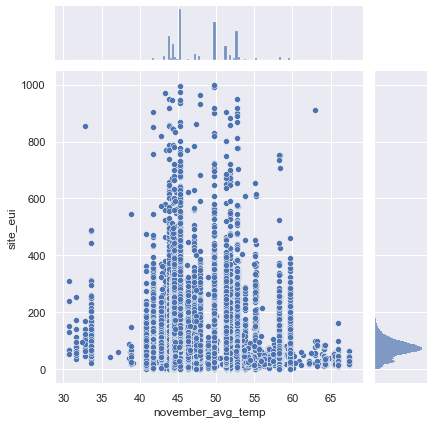

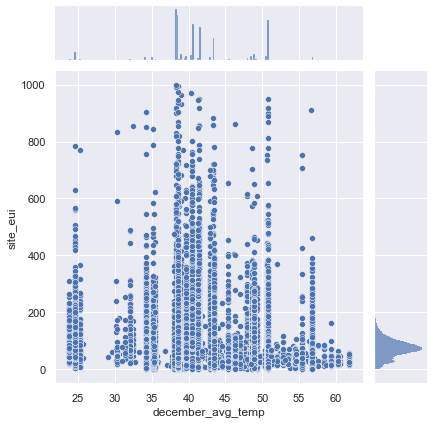

In [52]:
for month in months:
    col1 = month + '_avg_temp'
    col2 = 'site_eui'
    joint(col1, col2)

### Averages - Joint (temp vs. energy star rating)

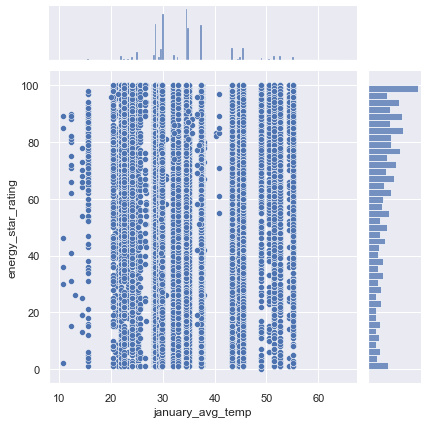

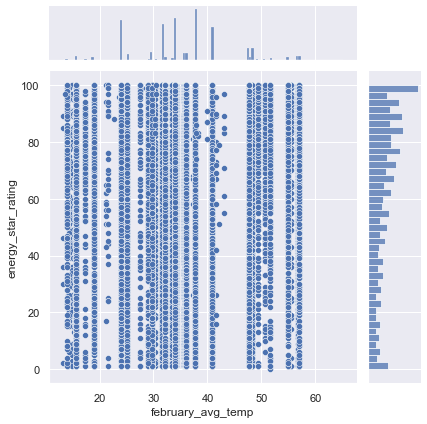

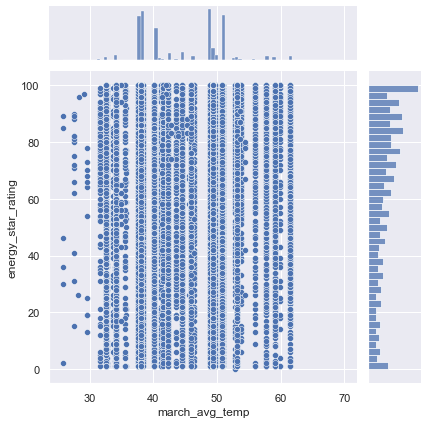

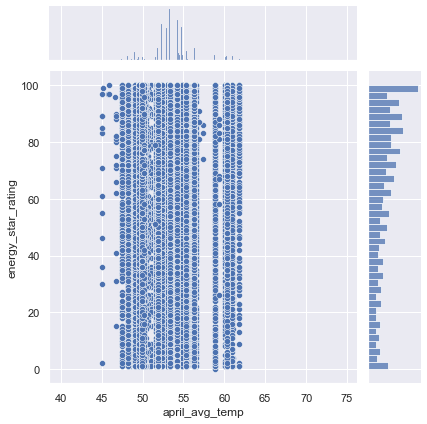

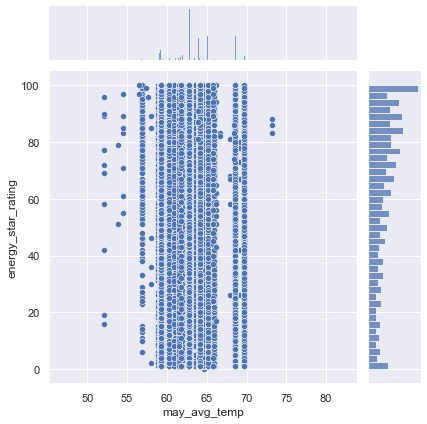

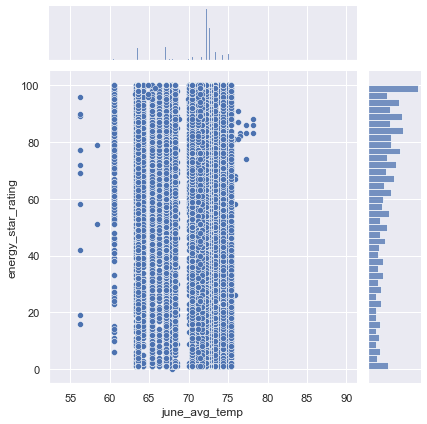

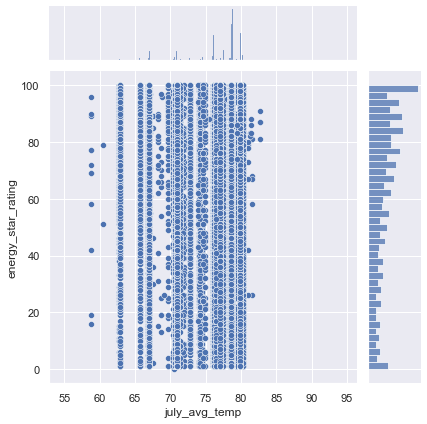

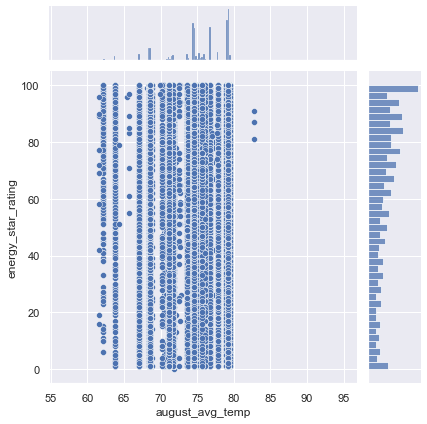

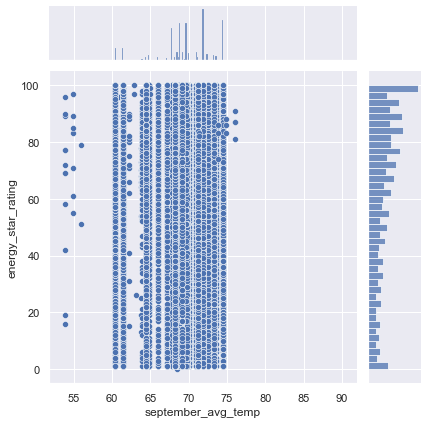

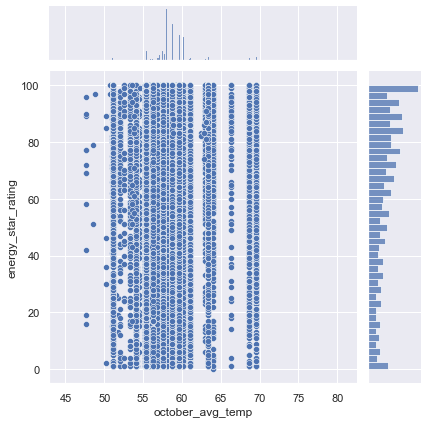

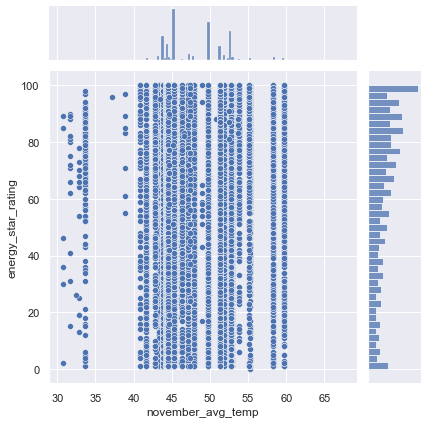

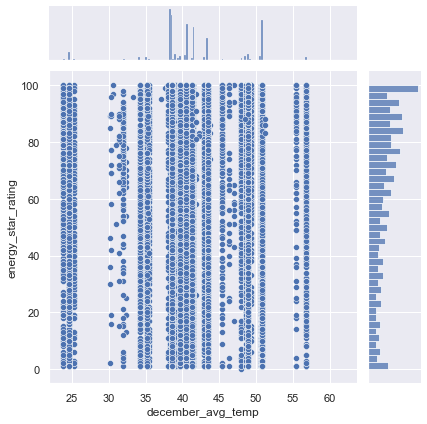

In [53]:
for month in months:
    col1 = month + '_avg_temp'
    col2 = 'energy_star_rating'
    joint(col1, col2)

### Maximums - Distribution

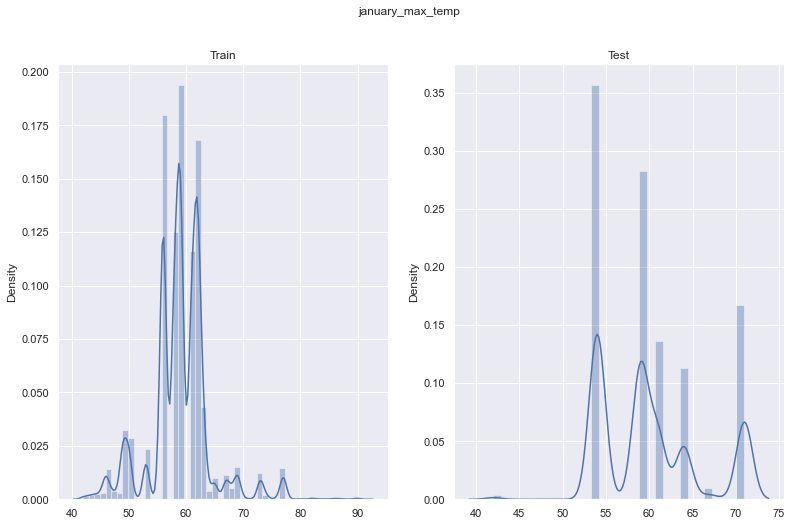

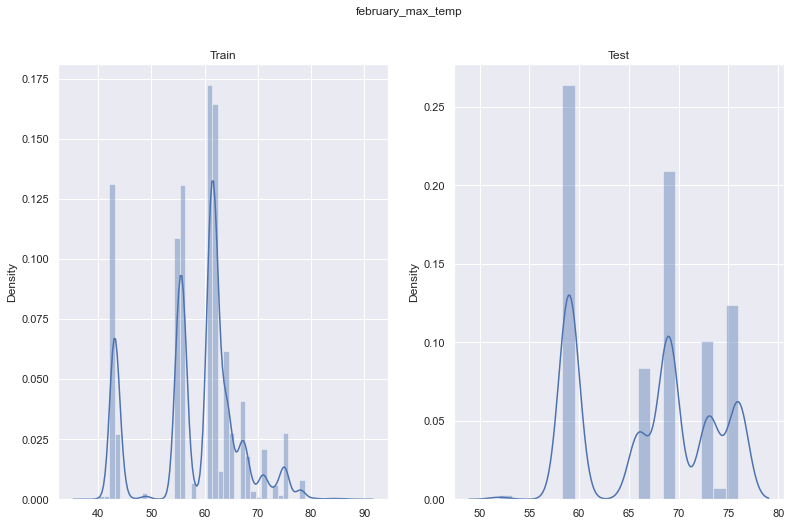

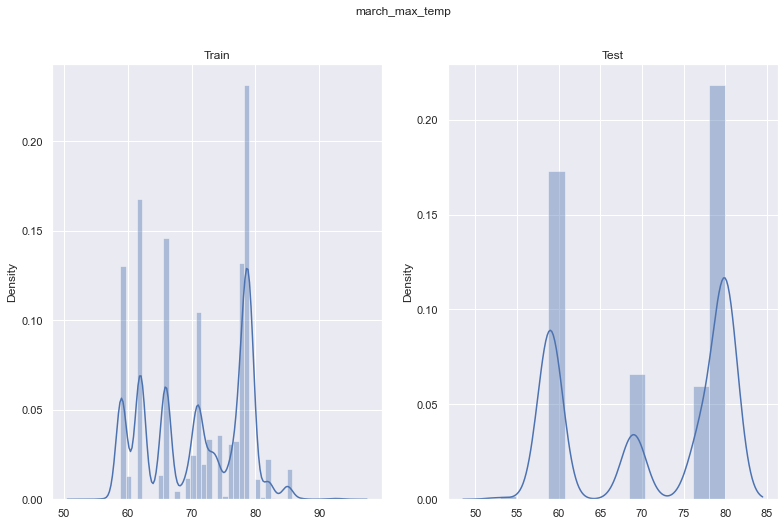

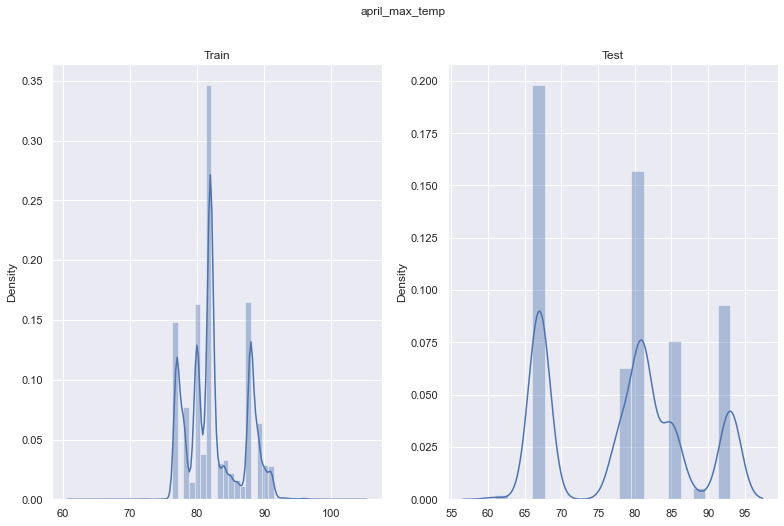

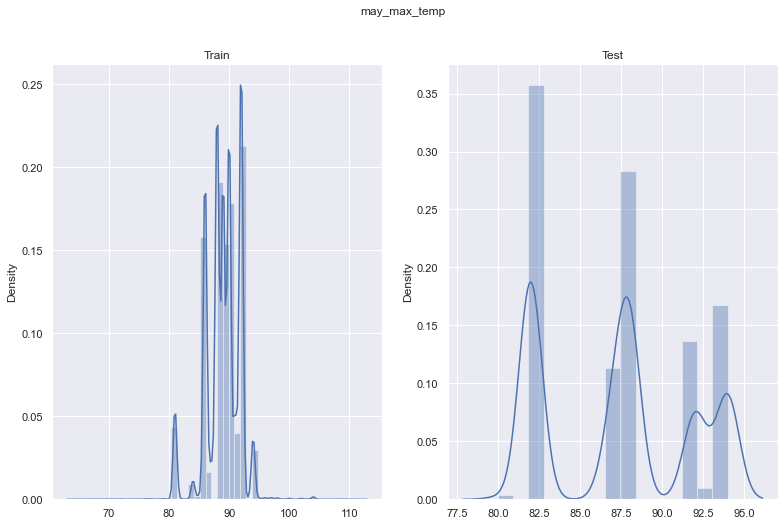

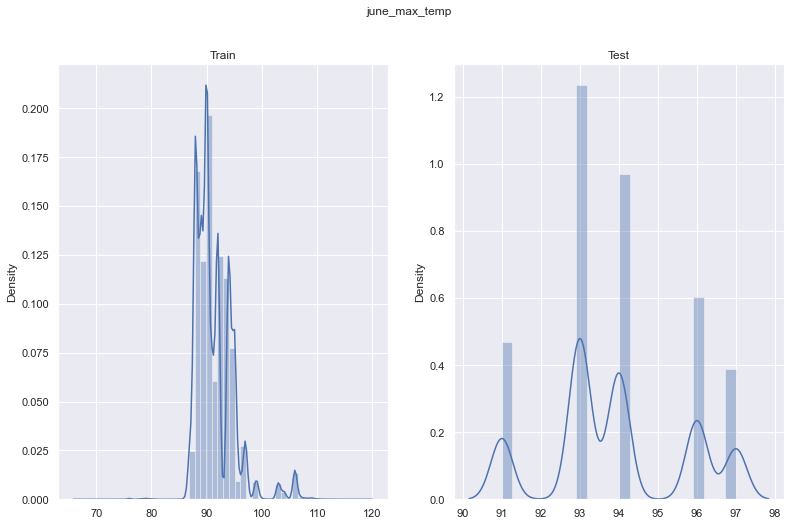

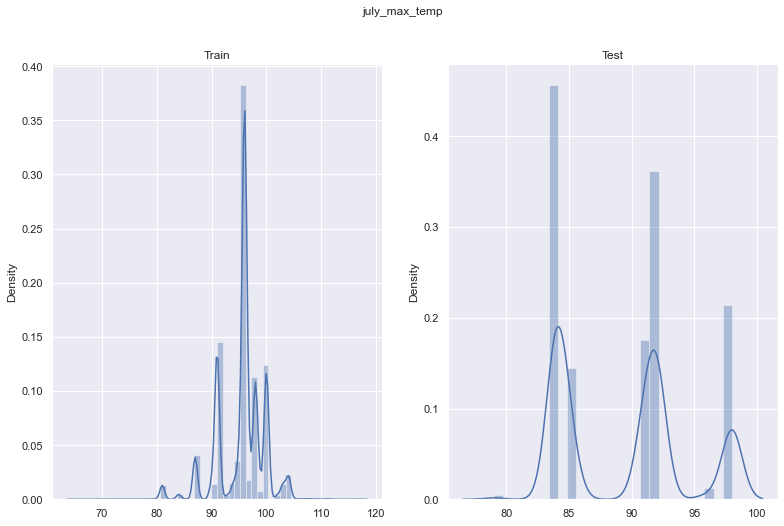

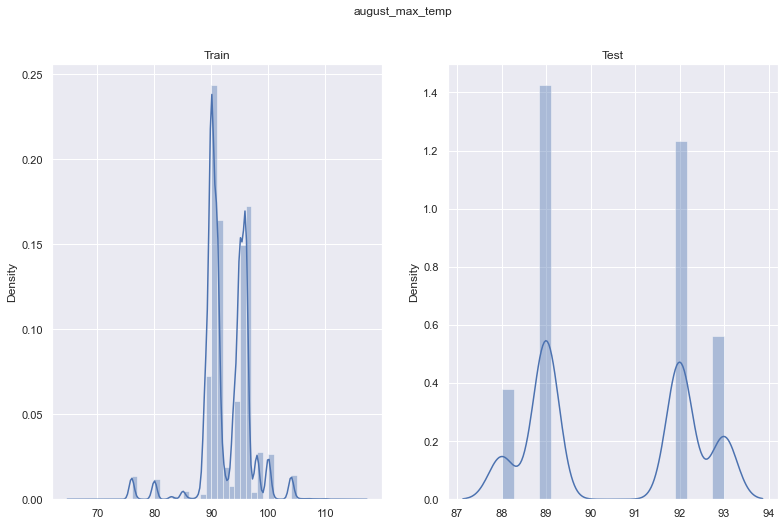

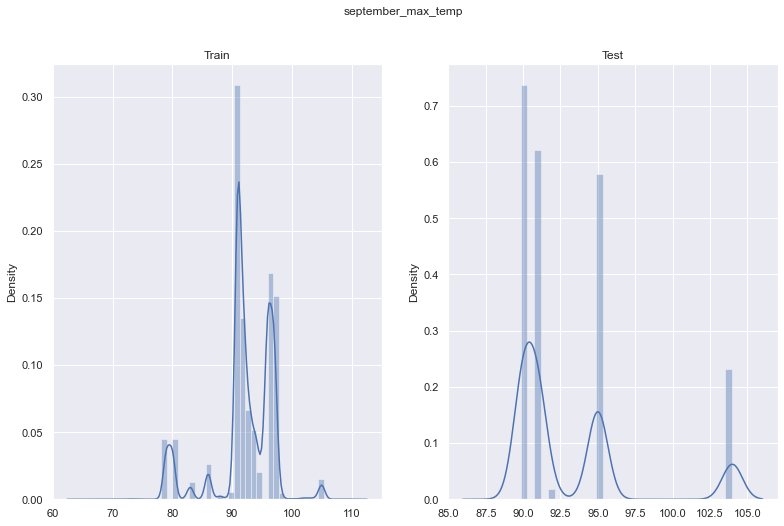

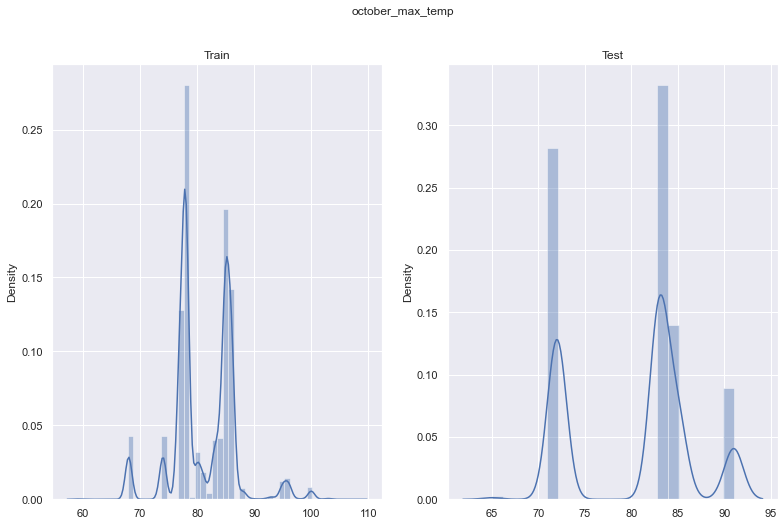

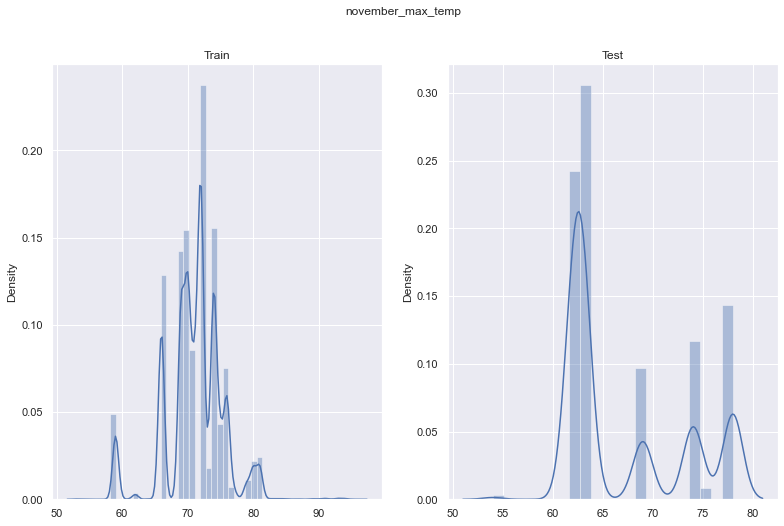

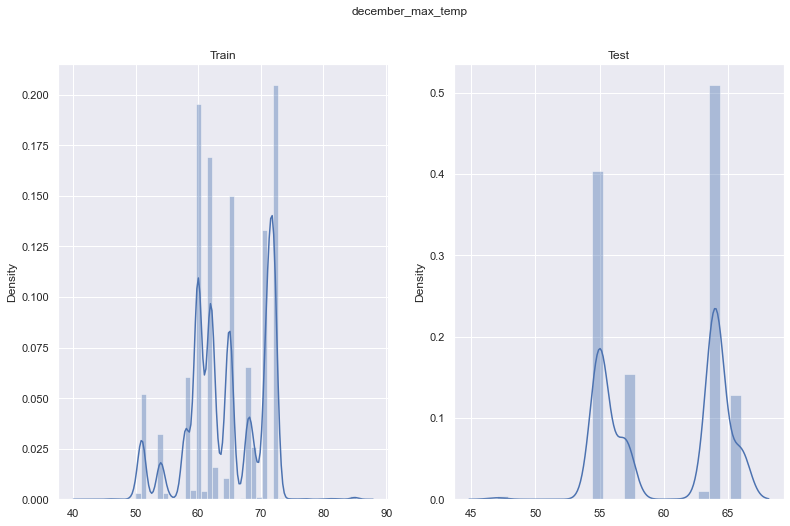

In [56]:
for month in months:
    col = month + '_max_temp'
    distribution(col)

## Maximums - Joint (temp vs. site eui)

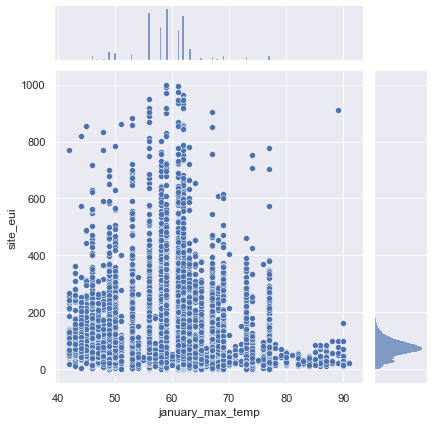

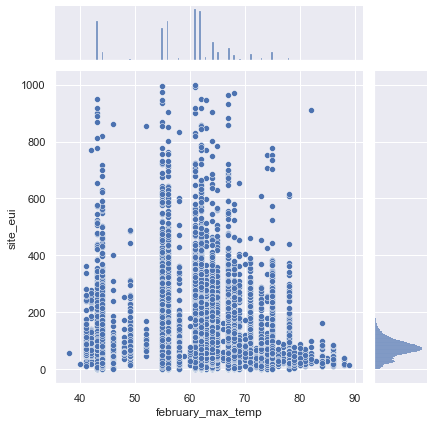

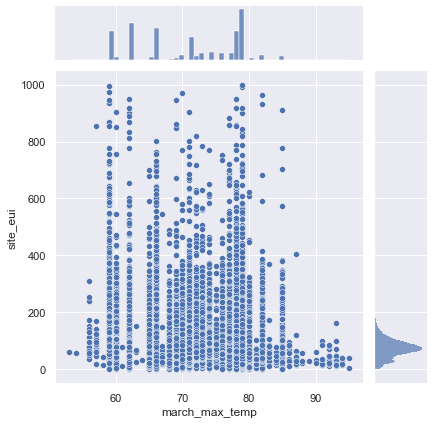

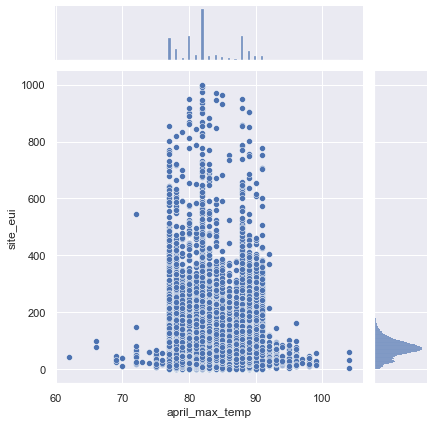

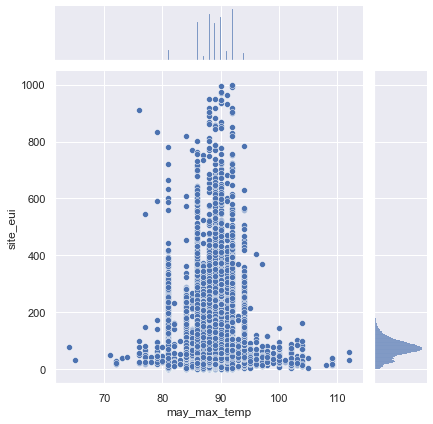

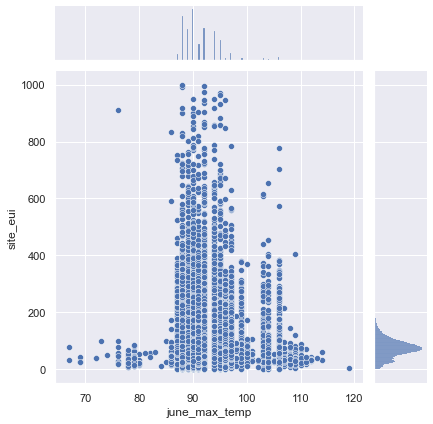

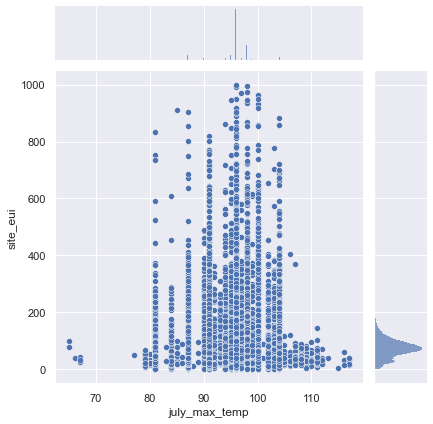

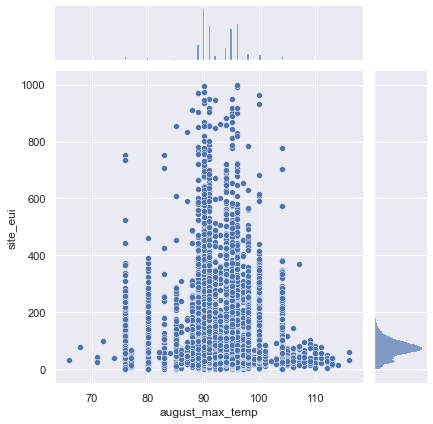

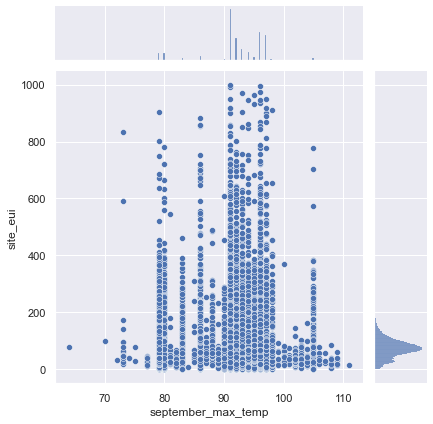

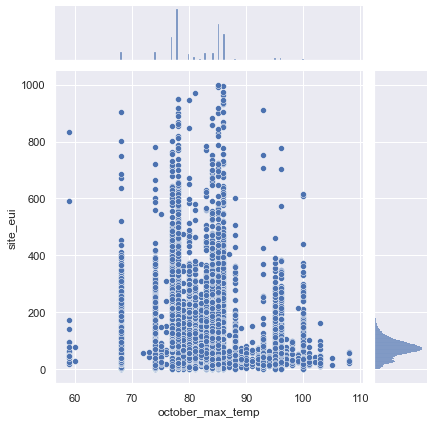

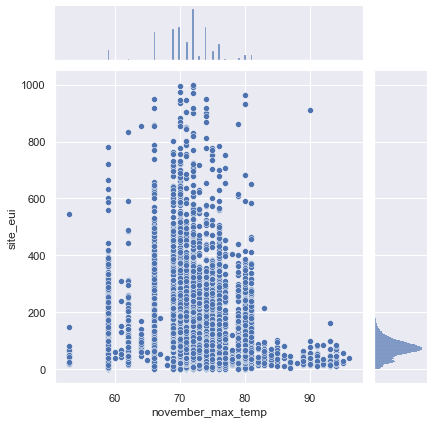

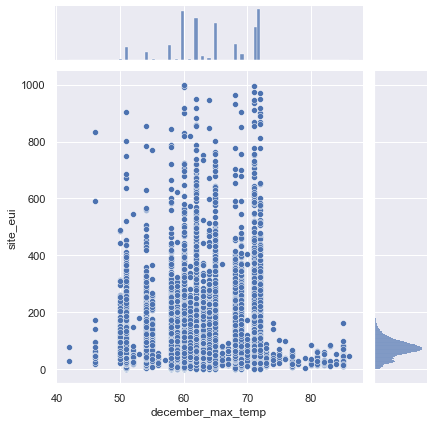

In [57]:
for month in months:
    col1 = month + '_max_temp'
    col2 = 'site_eui'
    joint(col1, col2)

### Maximums - Joint (temp vs. energy star rating)

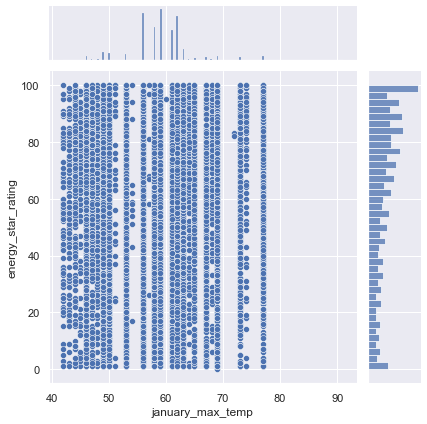

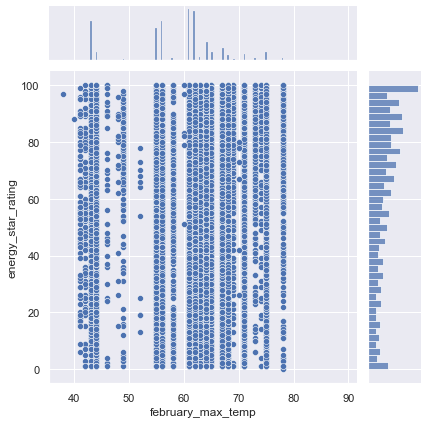

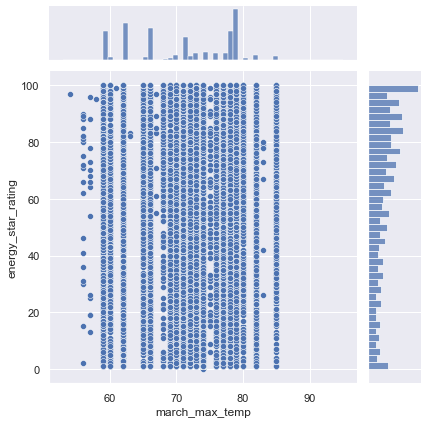

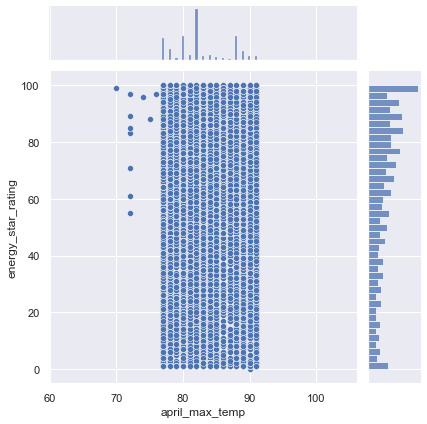

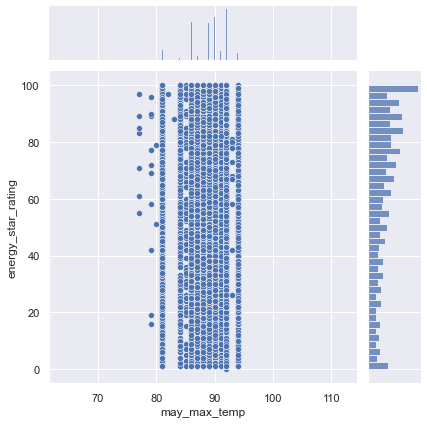

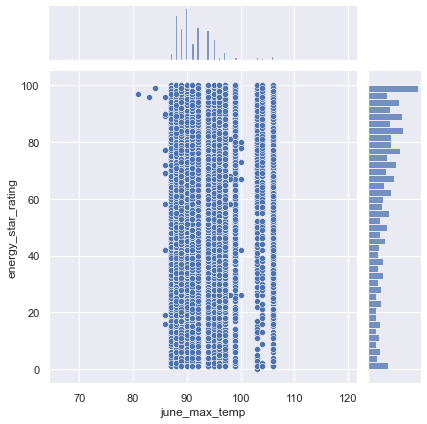

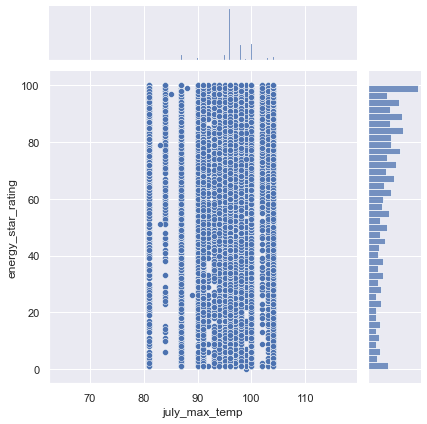

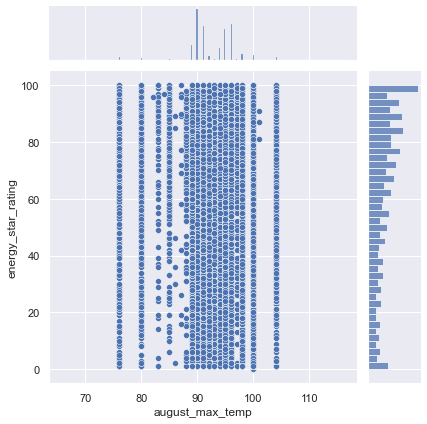

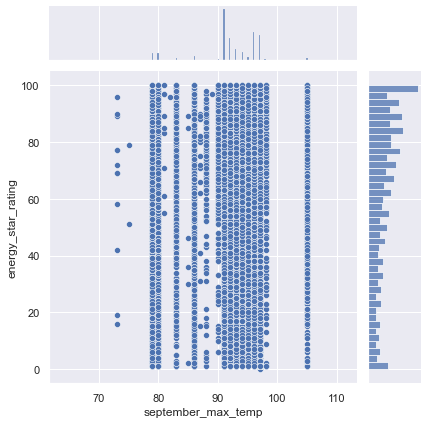

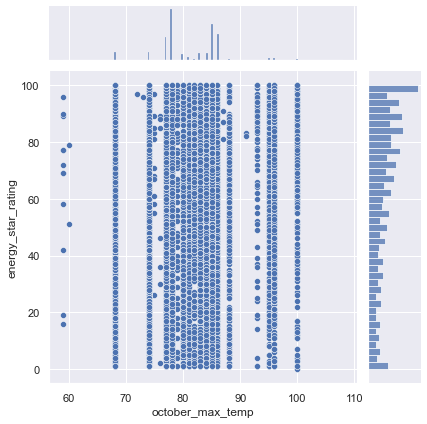

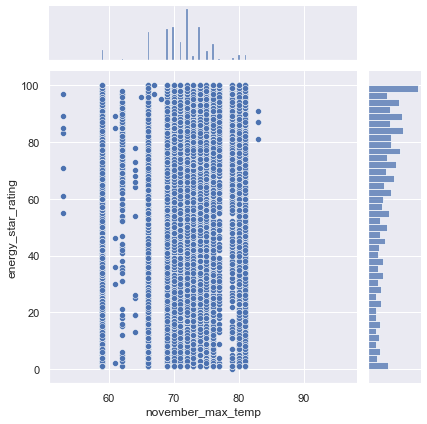

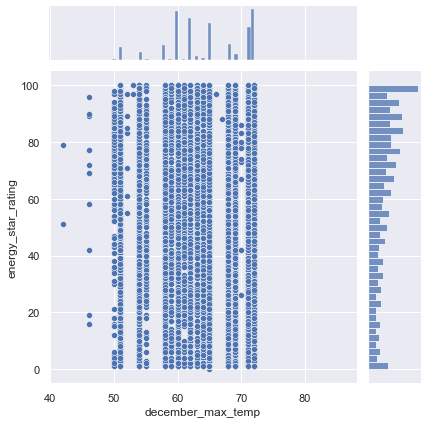

In [58]:
for month in months:
    col1 = month + '_max_temp'
    col2 = 'energy_star_rating'
    joint(col1, col2)

## 46. Cooling Degree Days

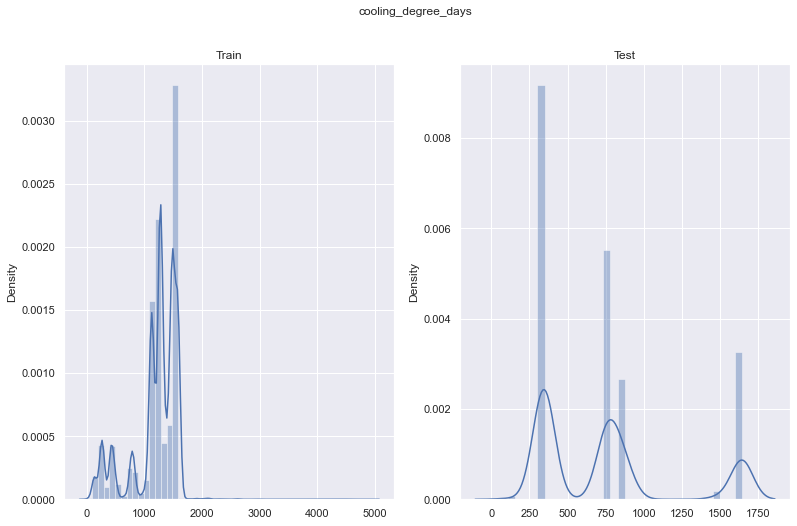

In [63]:
distribution('cooling_degree_days')

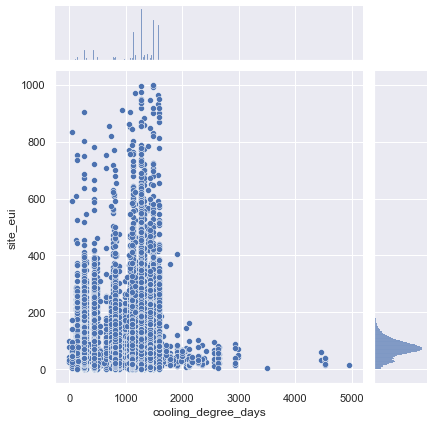

In [64]:
joint('cooling_degree_days', 'site_eui')

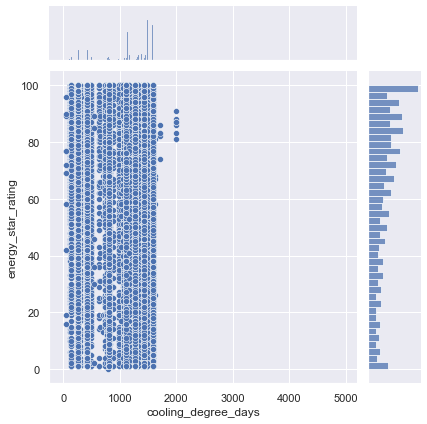

In [65]:
joint('cooling_degree_days', 'energy_star_rating')

In [66]:
cols_left = ['heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']

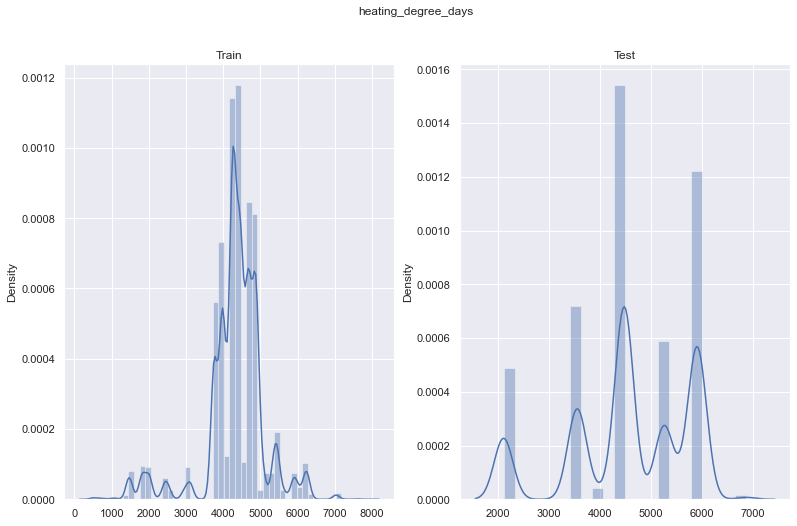

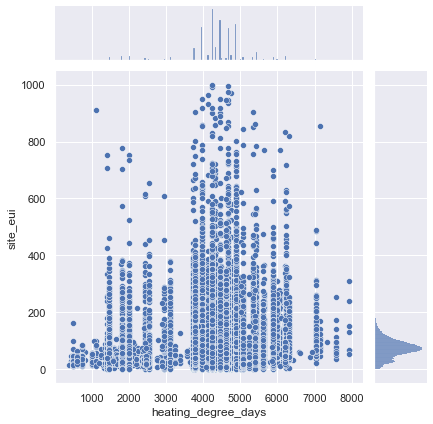

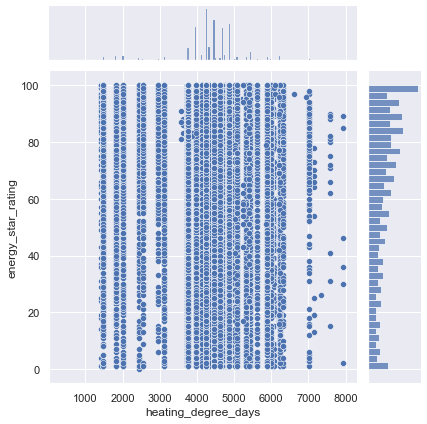

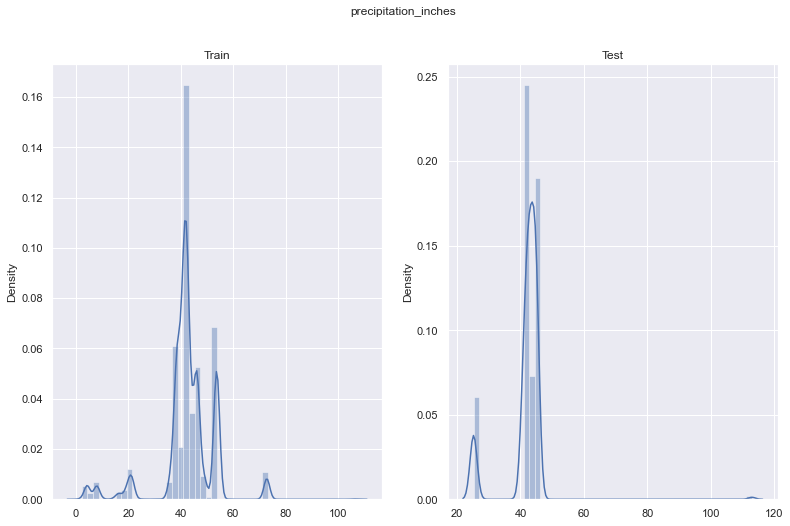

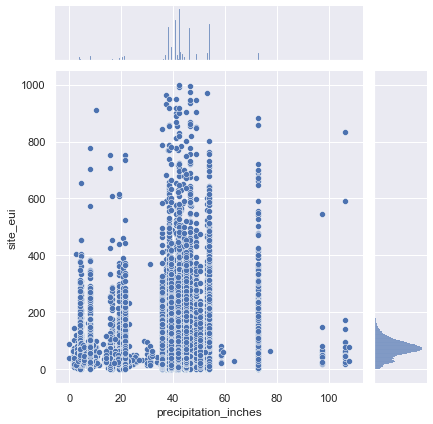

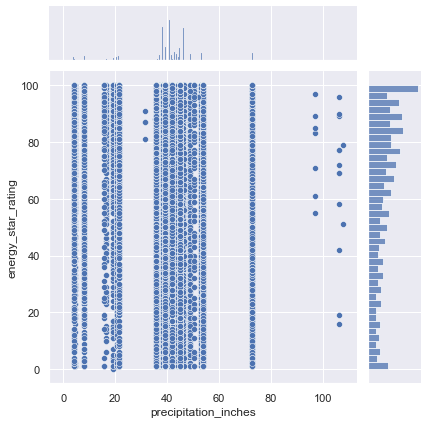

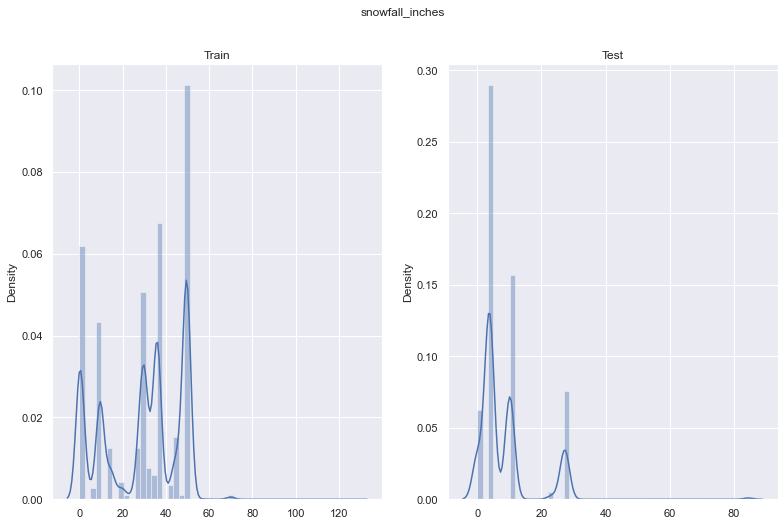

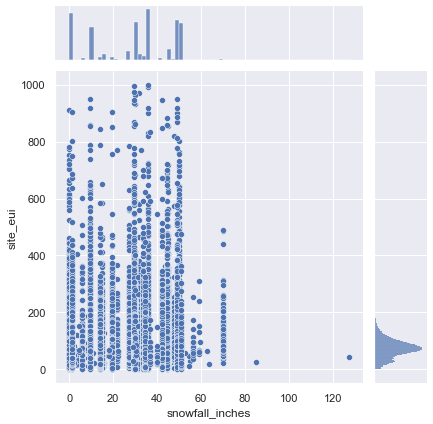

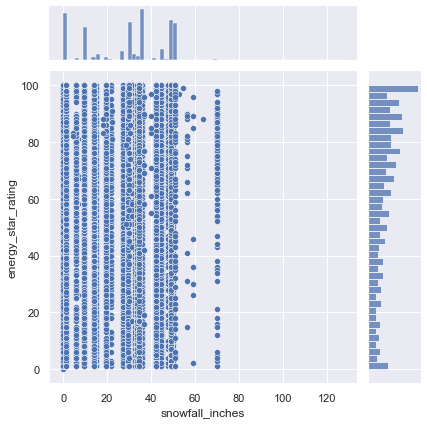

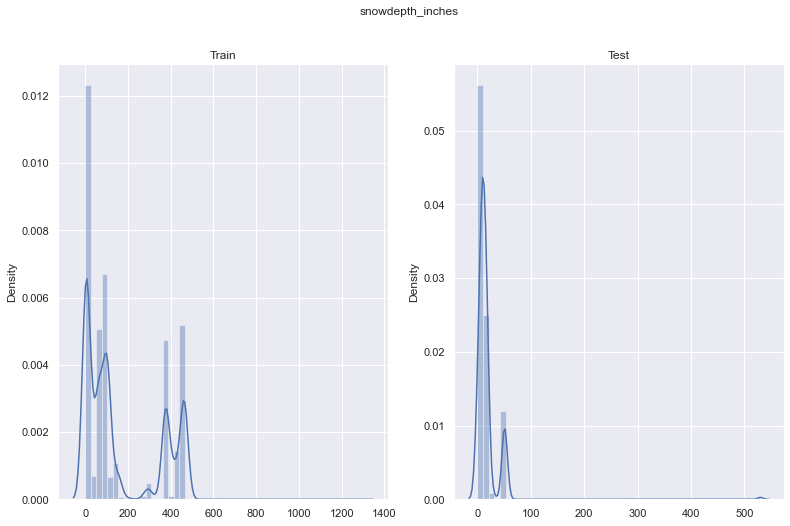

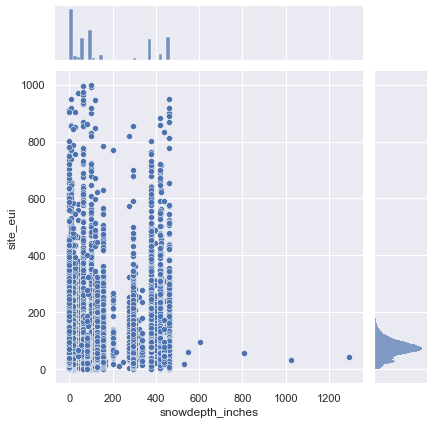

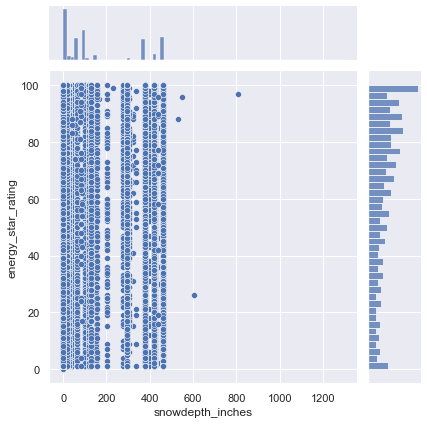

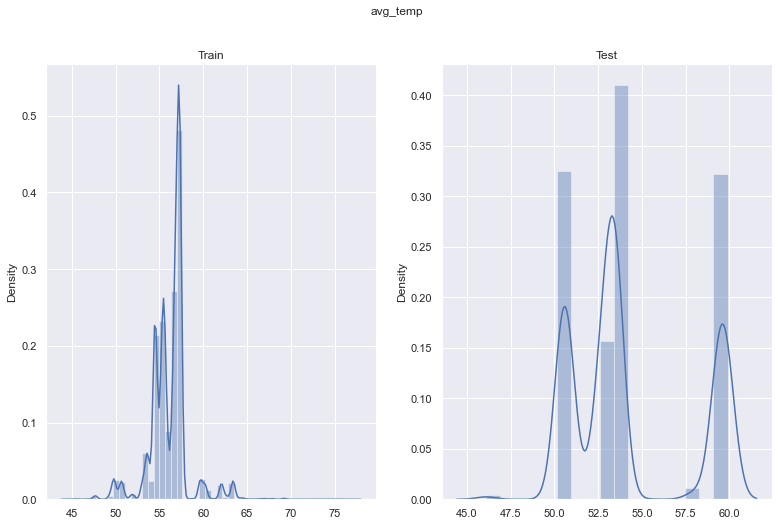

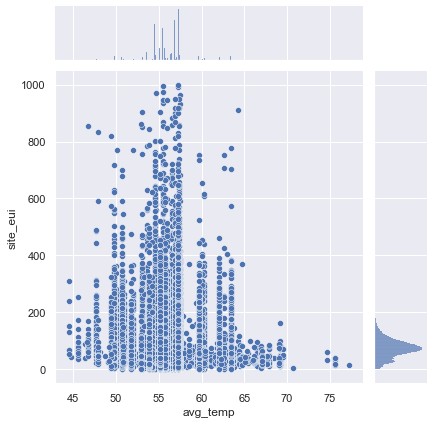

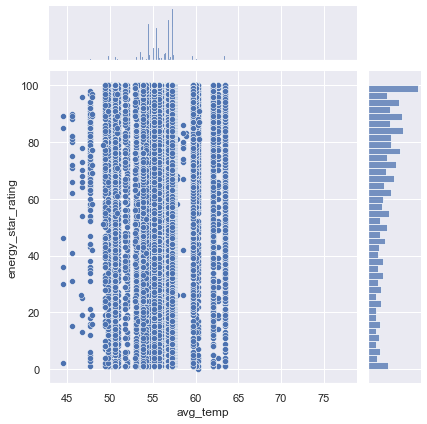

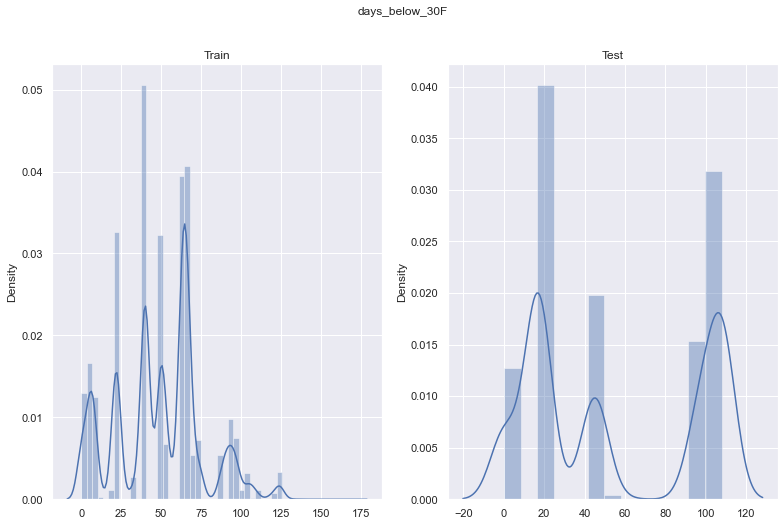

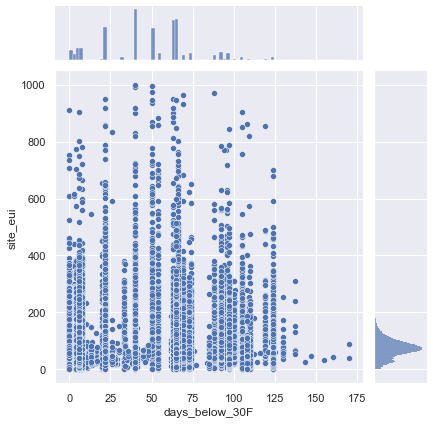

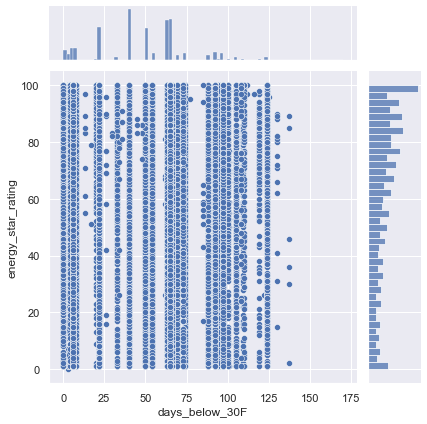

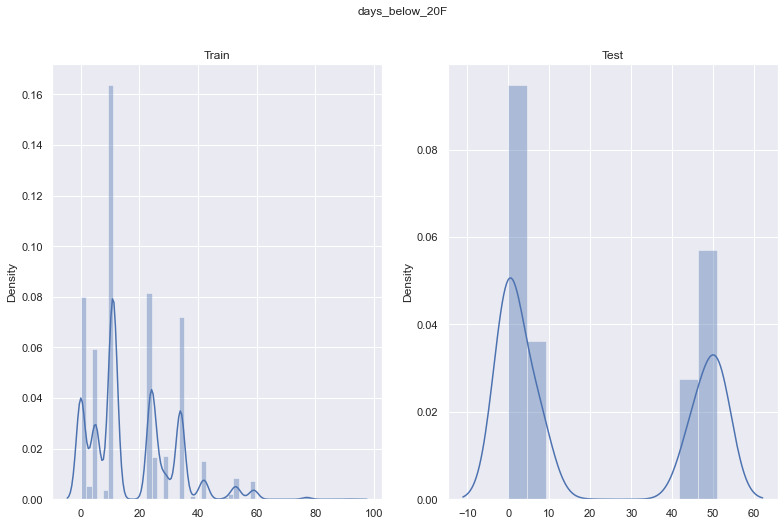

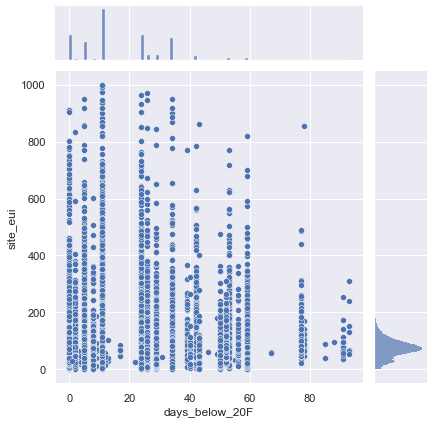

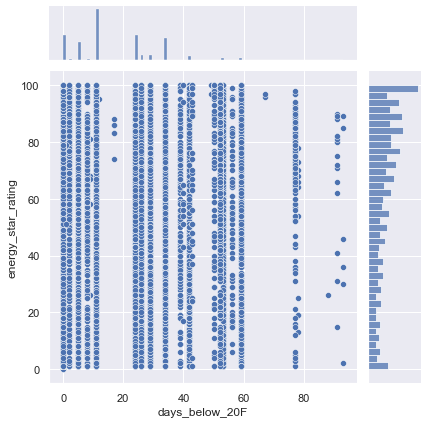

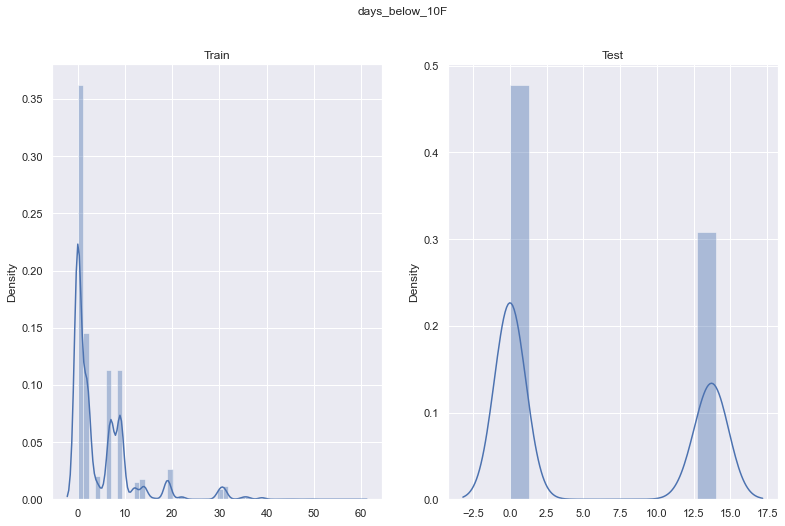

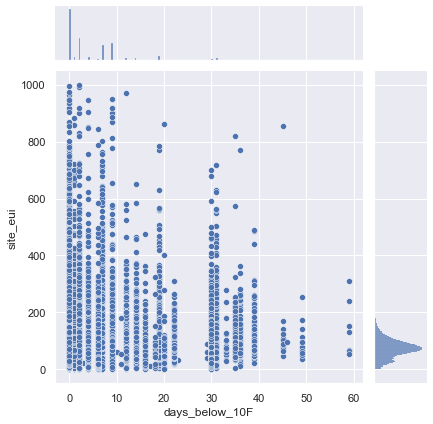

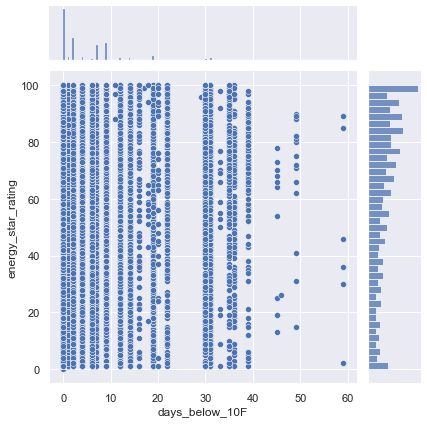

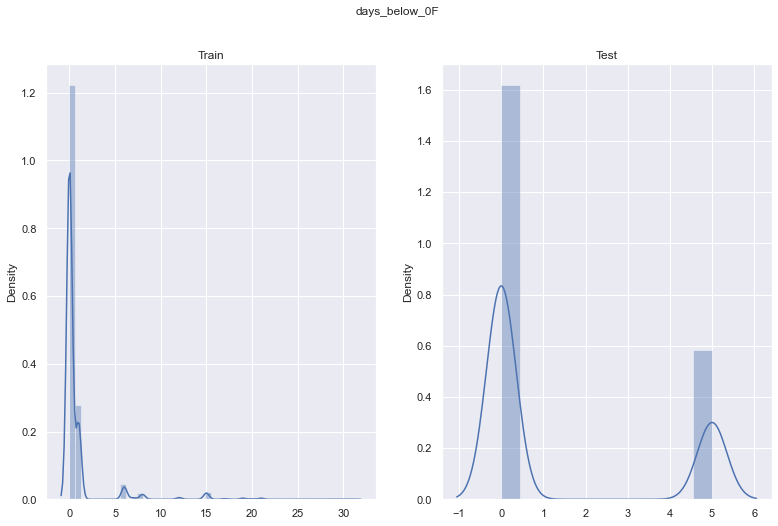

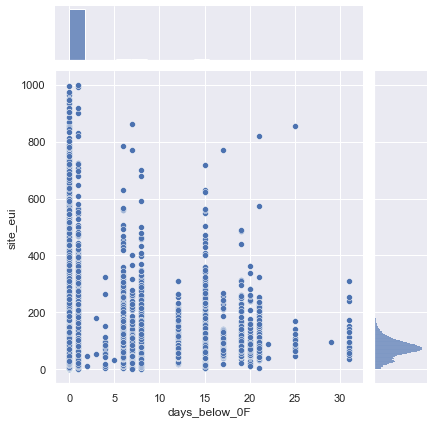

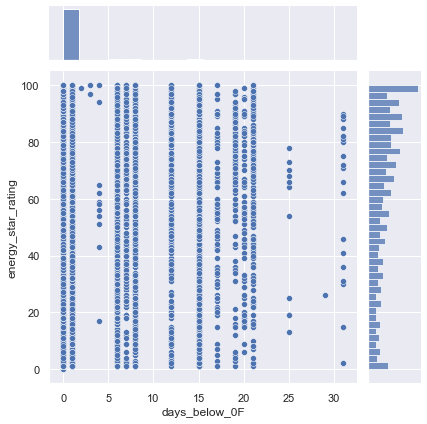

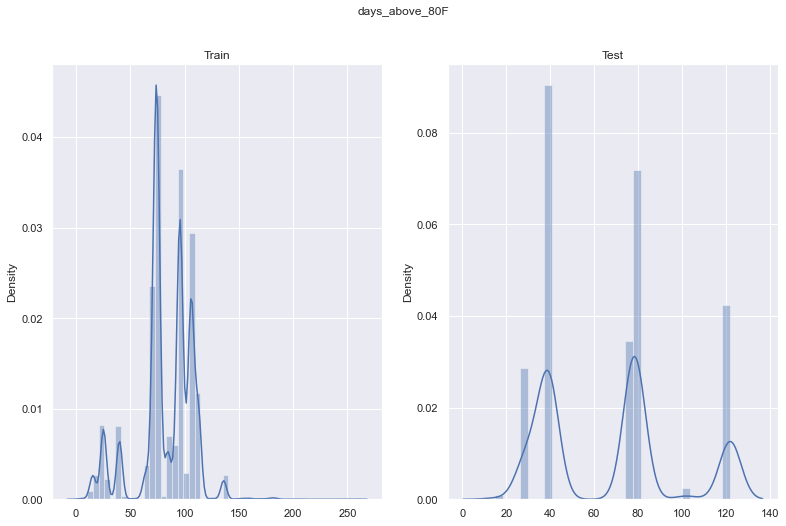

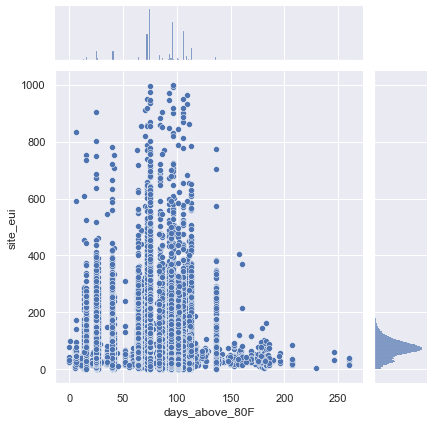

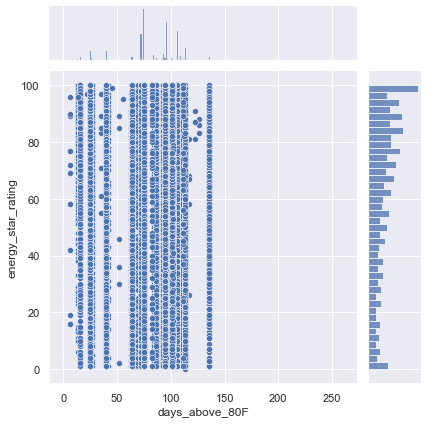

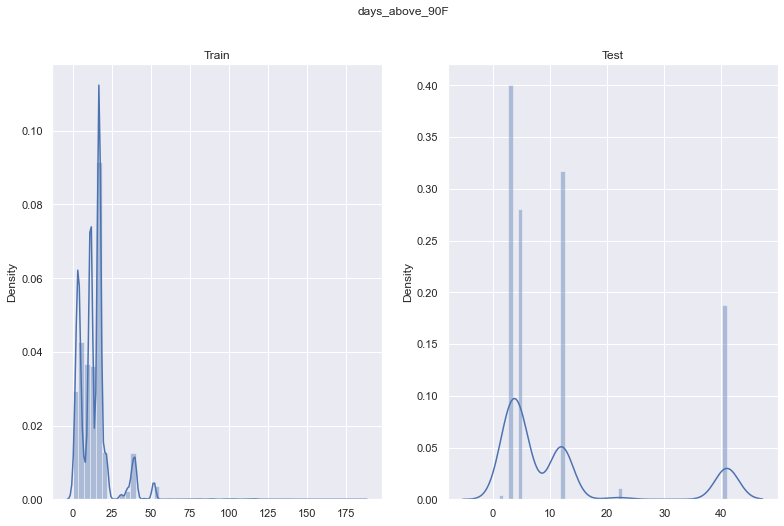

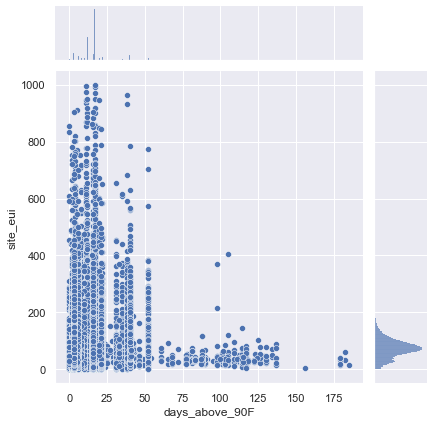

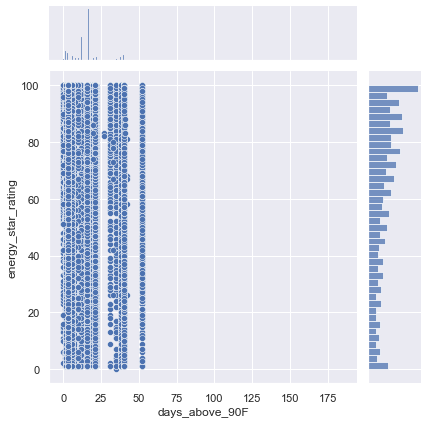

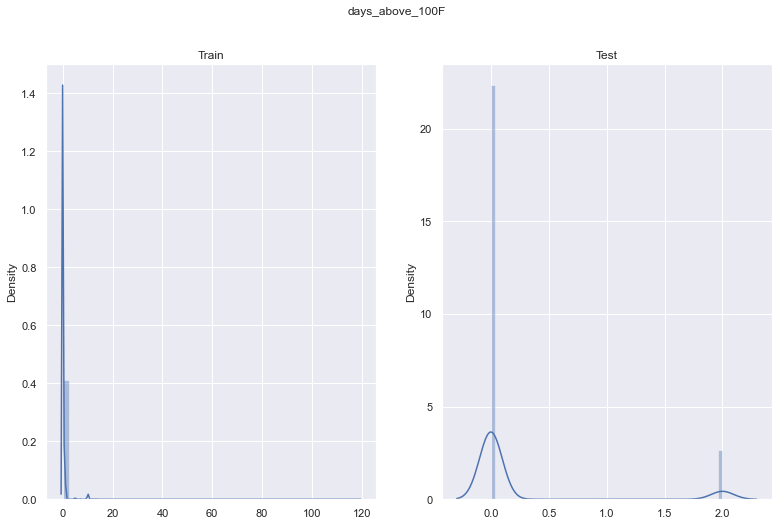

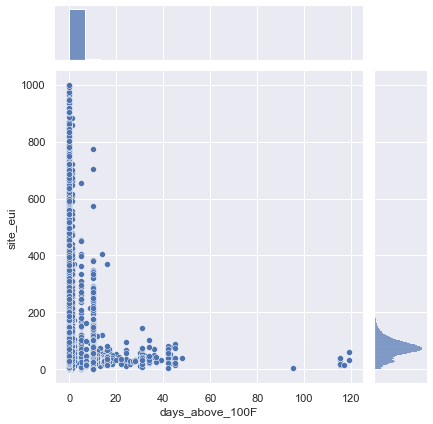

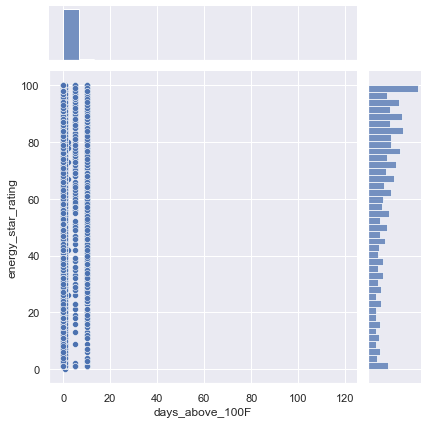

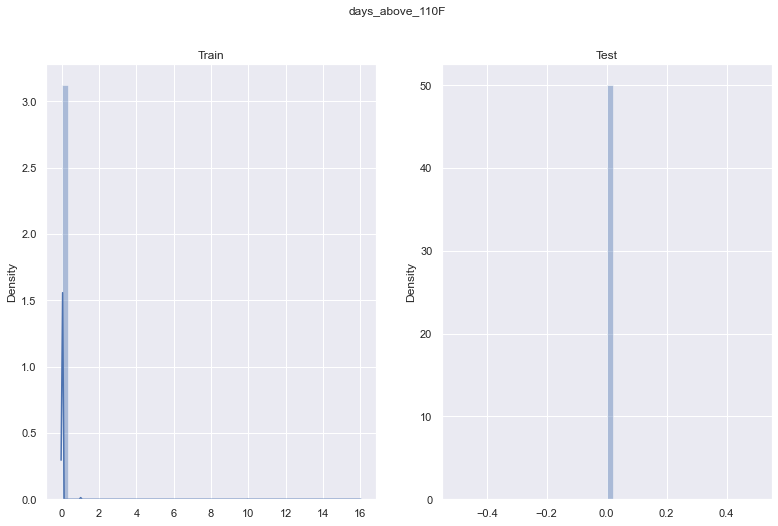

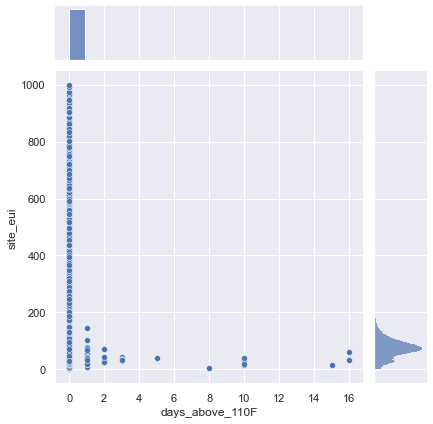

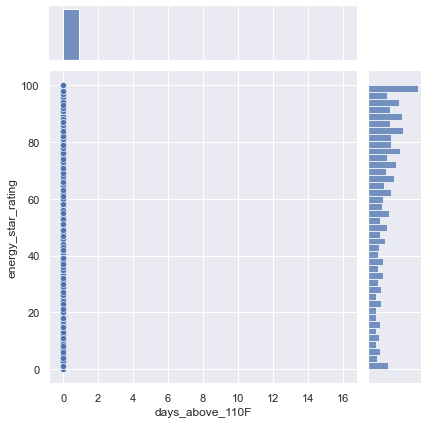

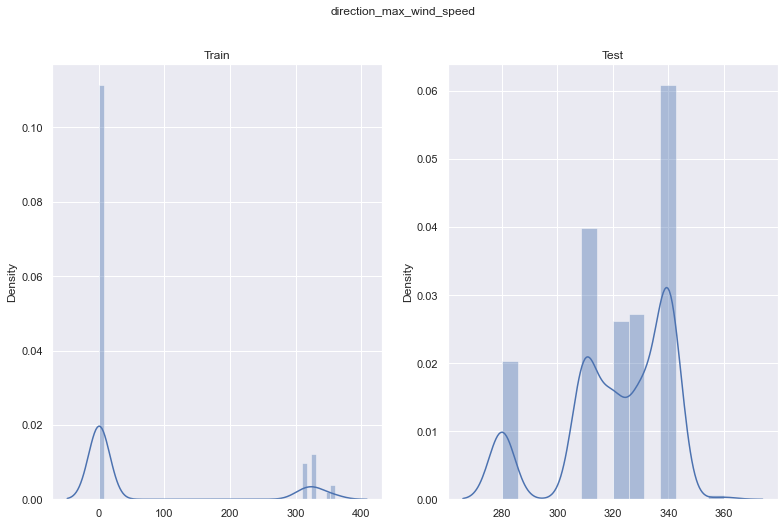

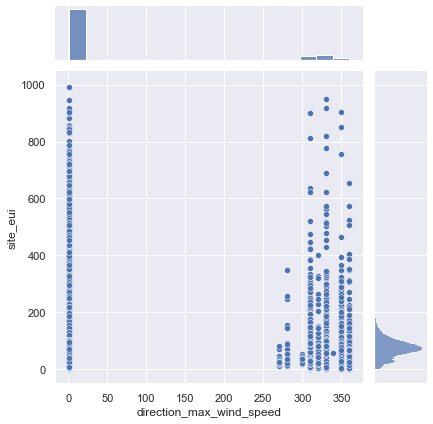

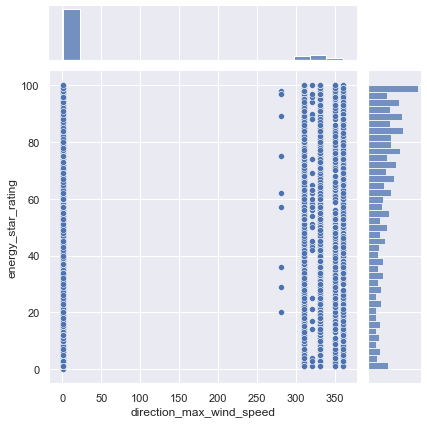

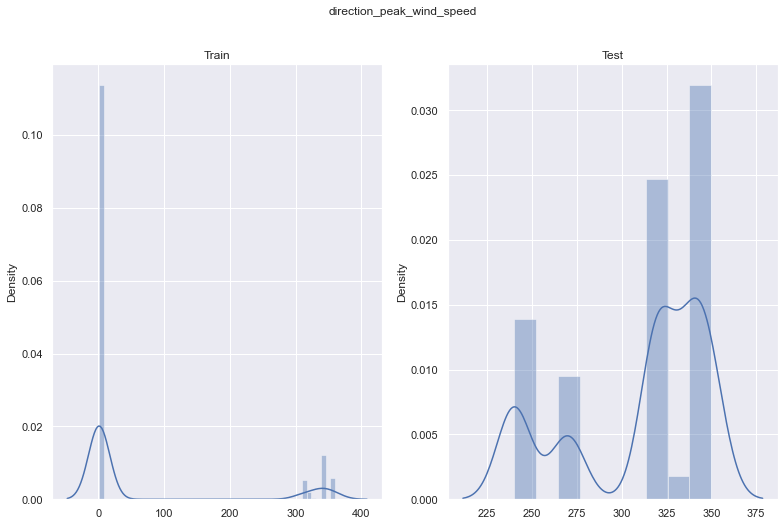

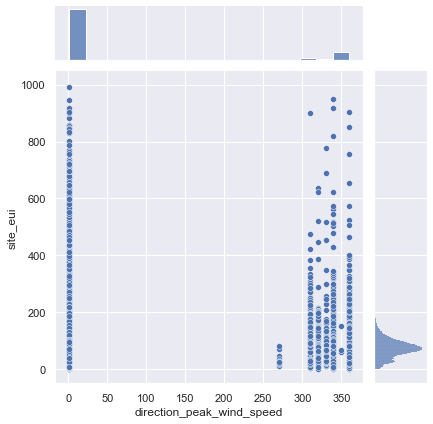

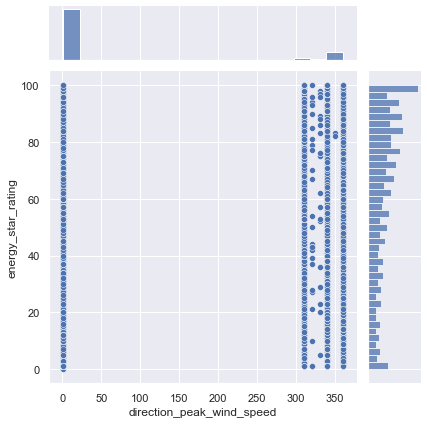

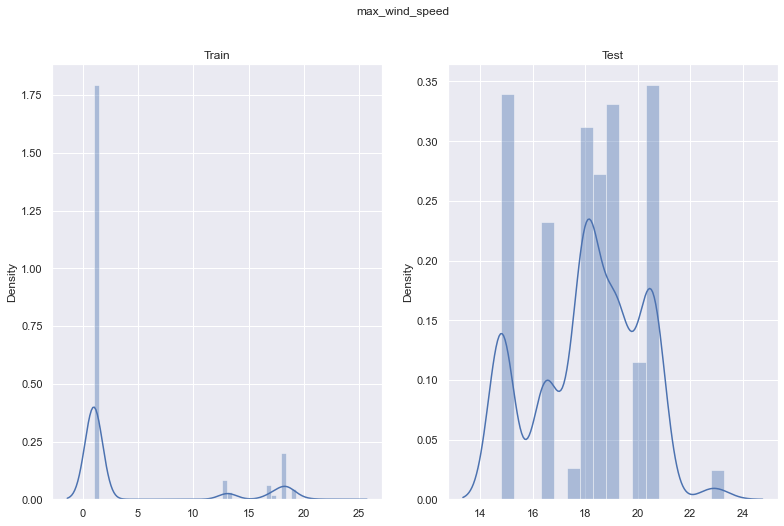

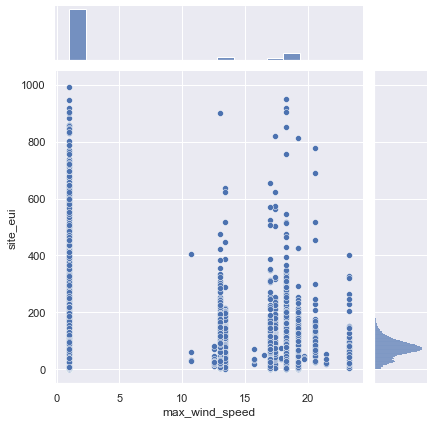

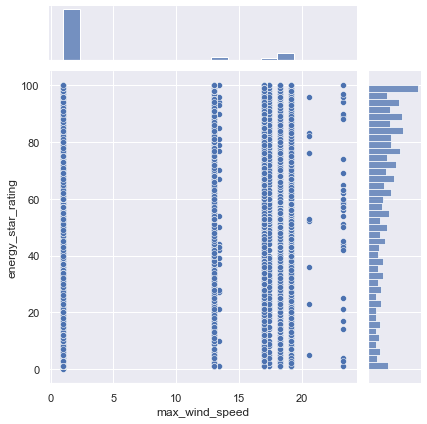

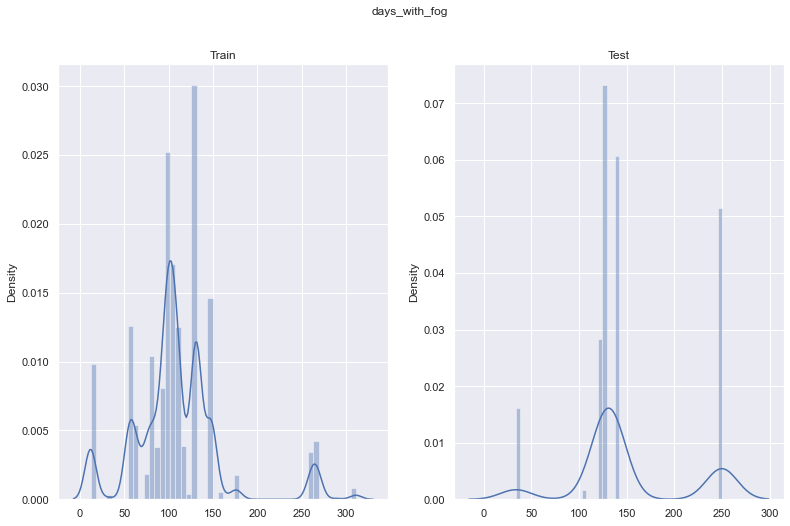

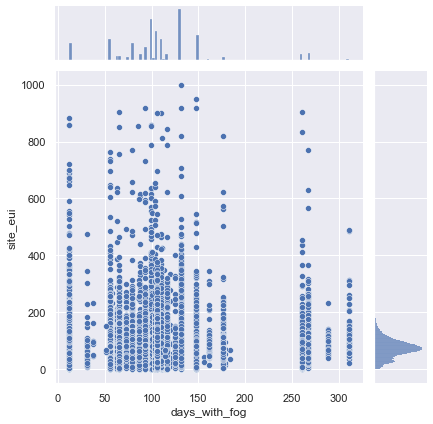

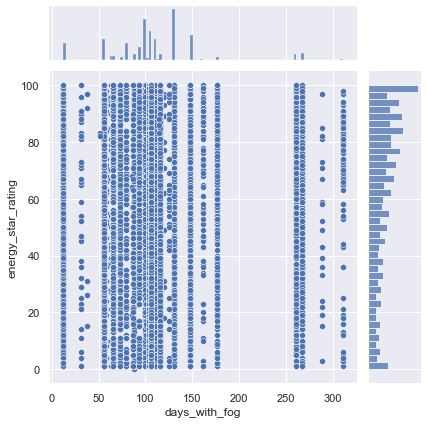

In [67]:
for col in cols_left:
    distribution(col)
    joint(col, 'site_eui')
    joint(col, 'energy_star_rating')